In [2]:
#5.11 high way
# last modified 2024/4/24 
# %matplotlib ipympl
%matplotlib inline
import h5py 
import glob
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from DasTools import DasPrep as dp
import os
import datetime
import matplotlib
import logging
import csv
import time
def concat(flist , start = 0 , span = 20 ):
    datalist = []

    for fname in flist[ start : min( start + span , len(flist) ) ]:
        data = dp.read_das(fname)
        datalist.append(data)

    
    data = np.concatenate(datalist, axis = 1)
    utc_datetime = datetime.datetime.strptime(flist[start][-22 : -7],'%Y%m%d_%H%M%S') + datetime.timedelta(hours=+8)
    utc_day = utc_datetime.strftime("%m-%d %H:%M")
    print("cat", data.shape)
    return data , utc_datetime, utc_day 


def psd(h5file , startn,endn , span_each_pic):
    with h5py.File(h5file, 'a') as f:
    # 创建一个dataset
        concat_time = 0
        ch_list = [i for i in range(2176)]
        for n in range(startn, endn):
            data , utc_datetime, utc_day = concat(flist , start= span_each_pic * n ,span= span_each_pic)
            nfft = 30000
            fs = 1000
            start = time.time()
            for i in range(len(ch_list)):
                ch = ch_list[i]
                if not f.__contains__(str(ch_list[i])):   #判断这个组存不存在
                    g = f.create_group(str(ch_list[i]))
                else:
                    g = f[str(ch_list[i])]
                # g =  f.create_group(str(ch_list[i]))  
                [f1,Pxx1] = signal.welch(data[i],                   # 随机信号
                                nfft=nfft,               # 每个窗的长度
                                fs=fs,                   # 采样频率   
                                # detrend='mean',          # 去掉均值
                                window=np.hanning(nfft), # 加汉尼窗
                                noverlap=int(nfft*3/4),  # 每个窗重叠75%的数据
                                )        # 求单边谱
                g.create_dataset(str(utc_day),  data=Pxx1, chunks = (3001) )
            concat_time +=  time.time() -start
            print(n , "拼接运行时间:%.2f min %d s"%( int(concat_time / 60) , concat_time%60) , datetime.datetime.now() , utc_day, "check in ")
        f.close()

flist = glob.glob('/mnt/f/Highway_2024_0510/test03_05_10/*.h5')
flist.sort()
print(len(flist))

path = '/mnt/f/Highway_2024_0510/output/psd_5_20_v0/'
if not os.path.exists(path):
    os.makedirs(path)

print(int(len(flist)/10))


h5fname = '/mnt/f/Highway_2024_0510/output/psd_5_20_v0/test03_05_10_1.hdf5'
psd(h5fname , 13, 25 ,10) #test03  14m17s / 8min 7s --->
# h5fname = '/mnt/f/Highway_2024_0510/output/psd_5_11_v3/test03_05_10_1.hdf5'
# psd(h5fname , 30, 62 ,4) #test03  14m17s / 8min 7s --->
# h5fname = '../output/DAS/psd_4_25_2.hdf5'
# psd(h5fname , 136 , 144 ) #31m39s / 14min 18s --->

#save file size = interval per chunk 

#当数据量比较小的时候要提高减少nfft 和span提高分辨率


247
24
cat (2176, 300000)
13 拼接运行时间:2.00 min 36 s 2024-05-21 16:28:19.210486 05-10 14:30 check in 
cat (2176, 300000)
14 拼接运行时间:5.00 min 11 s 2024-05-21 16:31:10.860328 05-10 14:35 check in 
cat (2176, 300000)
15 拼接运行时间:7.00 min 44 s 2024-05-21 16:34:01.010914 05-10 14:40 check in 
cat (2176, 300000)
16 拼接运行时间:10.00 min 16 s 2024-05-21 16:36:53.402692 05-10 14:45 check in 
cat (2176, 300000)
17 拼接运行时间:12.00 min 49 s 2024-05-21 16:39:42.550806 05-10 14:50 check in 
cat (2176, 300000)
18 拼接运行时间:15.00 min 21 s 2024-05-21 16:42:30.694683 05-10 14:55 check in 
cat (2176, 300000)
19 拼接运行时间:17.00 min 51 s 2024-05-21 16:45:20.326100 05-10 15:00 check in 
cat (2176, 300000)
20 拼接运行时间:20.00 min 23 s 2024-05-21 16:48:08.905797 05-10 15:05 check in 
cat (2176, 300000)
21 拼接运行时间:23.00 min 1 s 2024-05-21 16:51:03.843273 05-10 15:10 check in 
cat (2176, 300000)
22 拼接运行时间:25.00 min 34 s 2024-05-21 16:53:52.463082 05-10 15:15 check in 
cat (2176, 300000)
23 拼接运行时间:28.00 min 7 s 2024-05-21 16:56:42.1923

In [ ]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
# ch_list = [40,150,300,450,600,700,830,910,1000,1200,1420]
ch_list =[i for i in range(2176)]
for ch in ch_list:
    psd = []
    all_time = []
    for fi in range(0,1):
        with h5py.File('/mnt/f/Highway_2024_0510/output/psd_5_11_v2/test03_05_10.hdf5', 'r') as f:
            print(f.keys())
            if len(f[str(ch)].keys()) == 1 :
                dset = f[str(ch)]['01']
            else:
                dset = f[str(ch)]
            time = [key for key in dset.keys()]
            # print(time)
            # start = time.index('20:00:12')
            # time = time[start:]+time[:start]
            # print(time)

            psd.append(  [dset[key][:] for key in time])
            all_time.append(time[:])
            f.close()
    print("-----------read",ch,"------------")
    
    print(len(psd))
    print(len(all_time))
    psd = np.concatenate(psd)
    time = np.concatenate(all_time)
    print(psd.shape, psd[:20])
    print(len(time))
    psd = np.log(psd)
    plt.figure(figsize=(30,10))
    plt.imshow(psd.T, aspect='auto', cmap='jet',vmin=0, vmax=15)
    # plt.imshow(psd.T, aspect='auto', cmap='viridis')
    plt.grid(alpha = 1)

    xstick = range(0, len(time))
    ystick = [300*i for i in range(10)]
    # print(f['frequency'].shape)

    plt.xticks(xstick , [time[i][-5:]  for i in xstick],rotation = 0)
    # plt.xticks(xstick , [time[i][:2]+" "+time[i][3:]  for i in xstick],rotation = 0)

    plt.yticks(ystick , ['%d'% (i/30.)  for i in ystick])
    plt.ylabel("Frequency")
    plt.xlabel("Time")
    plt.title("log(PSD) Highway 5.10 Channel="+str(ch)+" nfft=6000")

    plt.colorbar()
    plt.savefig('/mnt/f/Highway_2024_0510/output/psd_5_11_v2/test03_ch_'+str(ch)+'_psd.png') #10s per pic
    plt.close()


-----------read 0 ------------
len(psd) 25 (25, 15001)
len(psd) 15001
psd.shape (15001,)
len all_psd 1
-----------read 1 ------------
len(psd) 25 (25, 15001)
len(psd) 15001
psd.shape (15001,)
len all_psd 2
-----------read 2 ------------
len(psd) 25 (25, 15001)
len(psd) 15001
psd.shape (15001,)
len all_psd 3
-----------read 3 ------------
len(psd) 25 (25, 15001)
len(psd) 15001
psd.shape (15001,)
len all_psd 4
-----------read 4 ------------
len(psd) 25 (25, 15001)
len(psd) 15001
psd.shape (15001,)
len all_psd 5
-----------read 5 ------------
len(psd) 25 (25, 15001)
len(psd) 15001
psd.shape (15001,)
len all_psd 6
-----------read 6 ------------
len(psd) 25 (25, 15001)
len(psd) 15001
psd.shape (15001,)
len all_psd 7
-----------read 7 ------------
len(psd) 25 (25, 15001)
len(psd) 15001
psd.shape (15001,)
len all_psd 8
-----------read 8 ------------
len(psd) 25 (25, 15001)
len(psd) 15001
psd.shape (15001,)
len all_psd 9
-----------read 9 ------------
len(psd) 25 (25, 15001)
len(psd) 15001
psd

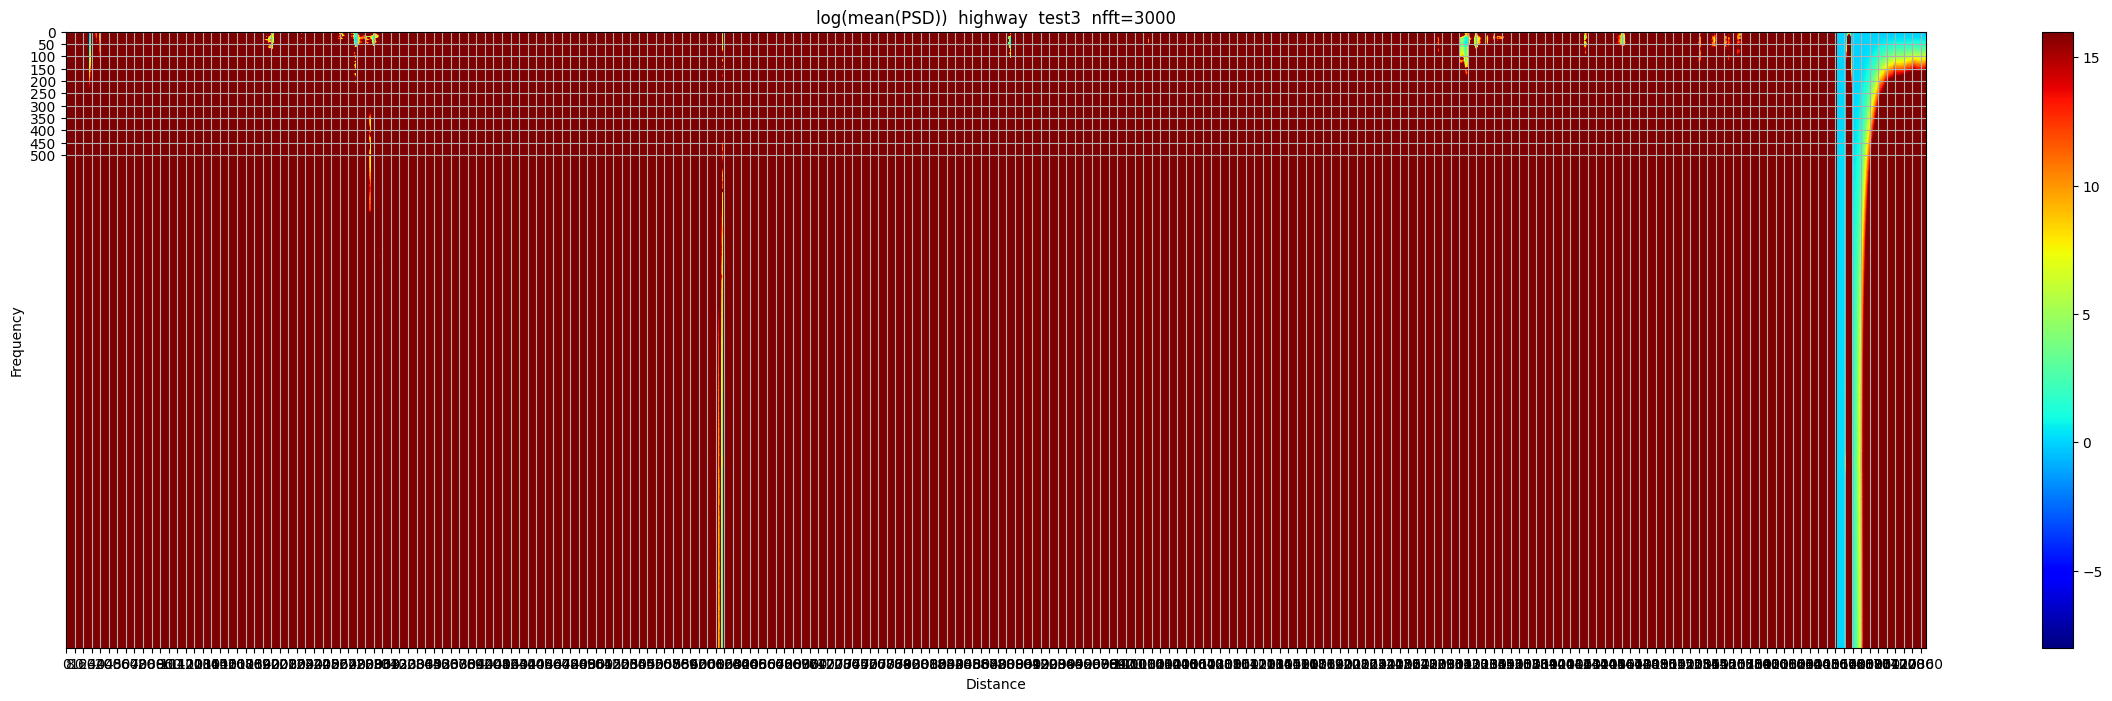

In [3]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
all_psd = []
ch_list = range(0,2176)
for ch in ch_list:
    psd = []
    for i in range(0,2):
        with h5py.File('/mnt/f/Highway_2024_0510/output/psd_5_20_v0/test03_05_10_'+str(i)+'.hdf5', 'r') as f:
            if len(f[str(ch)].keys()) == 1 :
                dset = f[str(ch)]['01']
            else:
                dset = f[str(ch)]
            time = [key for key in dset.keys()]
            # start = time.index('04 15:10') #fi = 3  
            # end= time.index('04 15:40')
            # # start = time.index('01-05 03:10') #fi = 5  test5: 3:10-3:40
            # # end= time.index('01-05 03:40')
            # time = time[start:end+1]
            # print(time)

            psd.append(  [dset[key][:] for key in time])
            f.close()
    print("-----------read",ch,"------------")
    psd = np.concatenate(psd )
    print("len(psd)",len(psd) , psd.shape)
    psd = np.mean(psd,axis=0) 
    print("len(psd)",len(psd))
    print("psd.shape",psd.shape)
    all_psd.append(psd)
    print("len all_psd",len(all_psd))
all_psd= np.array(all_psd)
print(all_psd.shape)

with h5py.File('/mnt/f/Highway_2024_0510/output/psd_5_20_v0/test03_05_10_all_psd.hdf5', 'w') as f:
    f.create_dataset("psd" , data = all_psd)

# all_psd = np.log(all_psd)

plt.figure(figsize=(30,8))
plt.imshow(all_psd.T, aspect='auto', cmap='jet',vmin=-8, vmax=16)
# plt.imshow(psd.T, aspect='auto', cmap='viridis')

xstick = range(0, len(ch_list) , 10 )
ystick = [300*i for i in range(11)]
# print(f['frequency'].shape)

plt.xticks(xstick ,[ch_list[i]*8  for i in xstick] ,rotation = 0)

plt.yticks(ystick , ['%d'% (i/6.)  for i in ystick])
plt.ylabel("Frequency")
plt.xlabel("Distance")
plt.grid()

# plt.title("log(mean(PSD)) test1=1.4 14:10-14:40 nfft=30,000")
# plt.title("log(mean(PSD)) test2=1.4 14:40-15:10 nfft=30,000")
plt.title("log(mean(PSD))  highway  test3  nfft=3000")
# plt.title("log(mean(PSD)) test4=1.5 02:00-02:25 nfft=30,000")
# plt.title("log(mean(PSD)) test5=1.5  03:10-03:40 nfft=30,000")

plt.colorbar()
plt.savefig('/mnt/f/Highway_2024_0510/output/test3') #10s per pic
plt.show()
plt.close()
#5-10s


In [4]:
sum_psd = np.sum(all_psd , axis = 1)
print(sum_psd.shape)

with h5py.File('/mnt/f/Highway_2024_0510/output/psd_5_20_v0/test03_05_10_all_psd.hdf5', 'a') as f:
    f.create_dataset("sum_psd" , data = sum_psd)

(2176,)


In [ ]:
def show_psd_Hz_km(flist  , ch_list, frequencise , start_time , end_time,title,  dis_spacing ,   save_path , log = True):

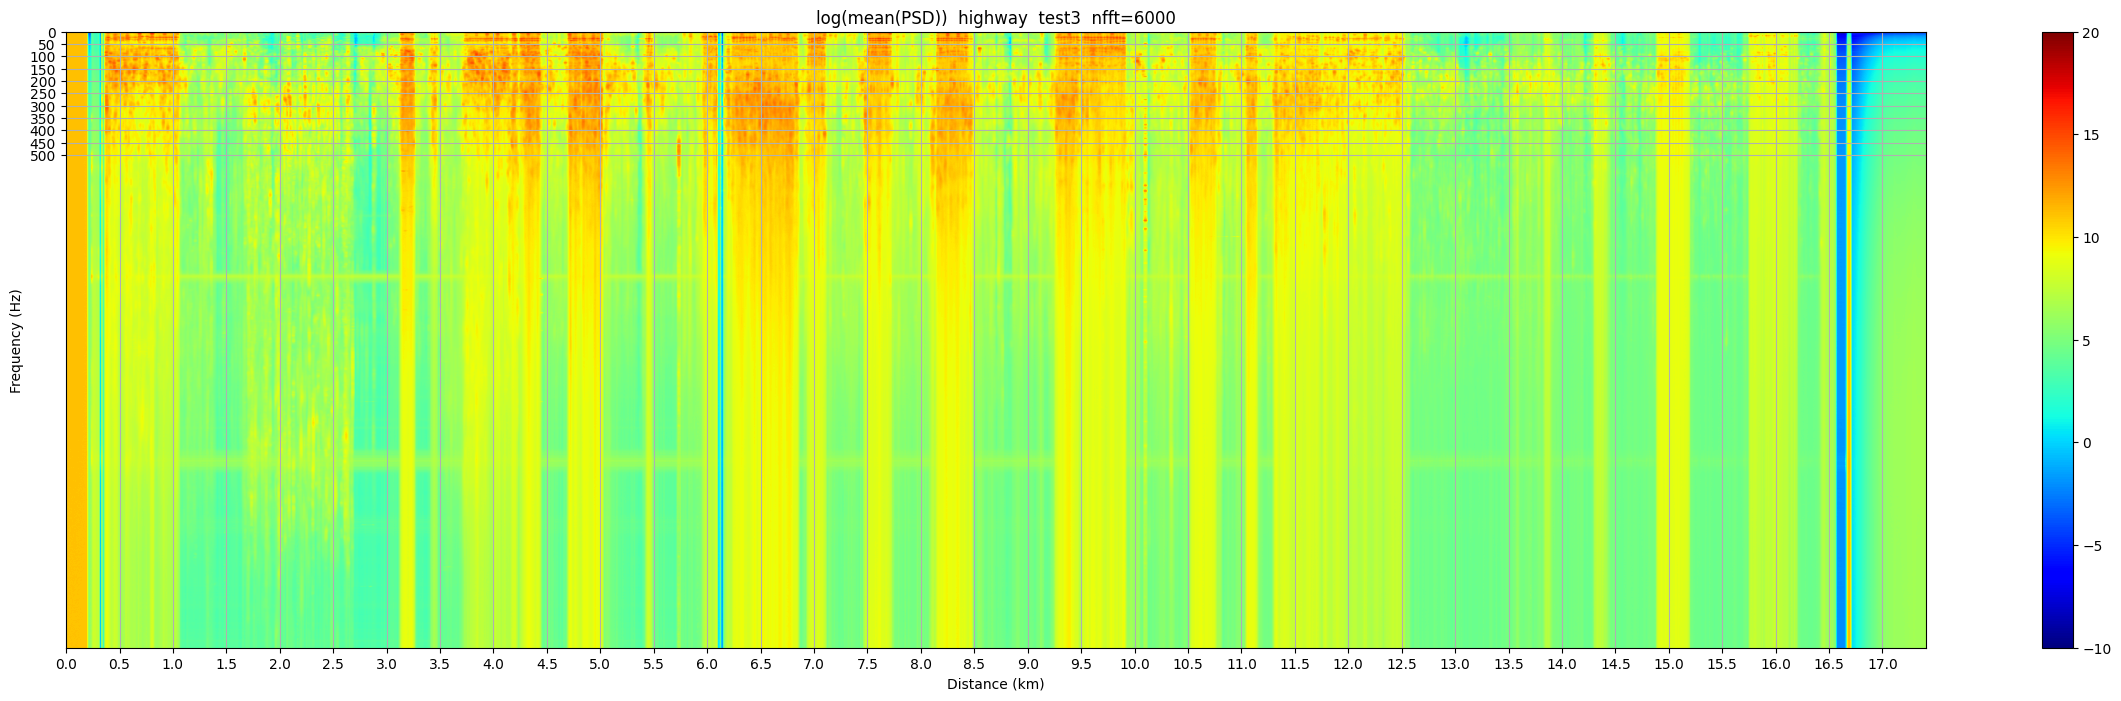

In [5]:
log_psd  = np.log(all_psd)
plt.figure(figsize=(30,8))
plt.imshow(log_psd.T, aspect='auto', cmap='jet',vmin=-10, vmax=20)
# plt.imshow(psd.T, aspect='auto', cmap='viridis')

xstick = np.array(range(0, len(ch_list) * 2 , 125 ) ) /2
ystick = [300*i for i in range(11)]
# print(f['frequency'].shape)

plt.xticks(xstick ,[ i*8/1000  for i in xstick] ,rotation = 0)

plt.yticks(ystick , ['%d'% (i/6.)  for i in ystick])
plt.ylabel("Frequency (Hz)")
plt.xlabel("Distance (km)")
plt.grid()

# plt.title("log(mean(PSD)) test1=1.4 14:10-14:40 nfft=30,000")
# plt.title("log(mean(PSD)) test2=1.4 14:40-15:10 nfft=30,000")
plt.title("log(mean(PSD))  highway  test3  nfft=6000")
# plt.title("log(mean(PSD)) test4=1.5 02:00-02:25 nfft=30,000")
# plt.title("log(mean(PSD)) test5=1.5  03:10-03:40 nfft=30,000")

plt.colorbar()
plt.savefig('/mnt/f/Highway_2024_0510/output/test3_1_log') #10s per pic
plt.show()
plt.close()
#5-10s

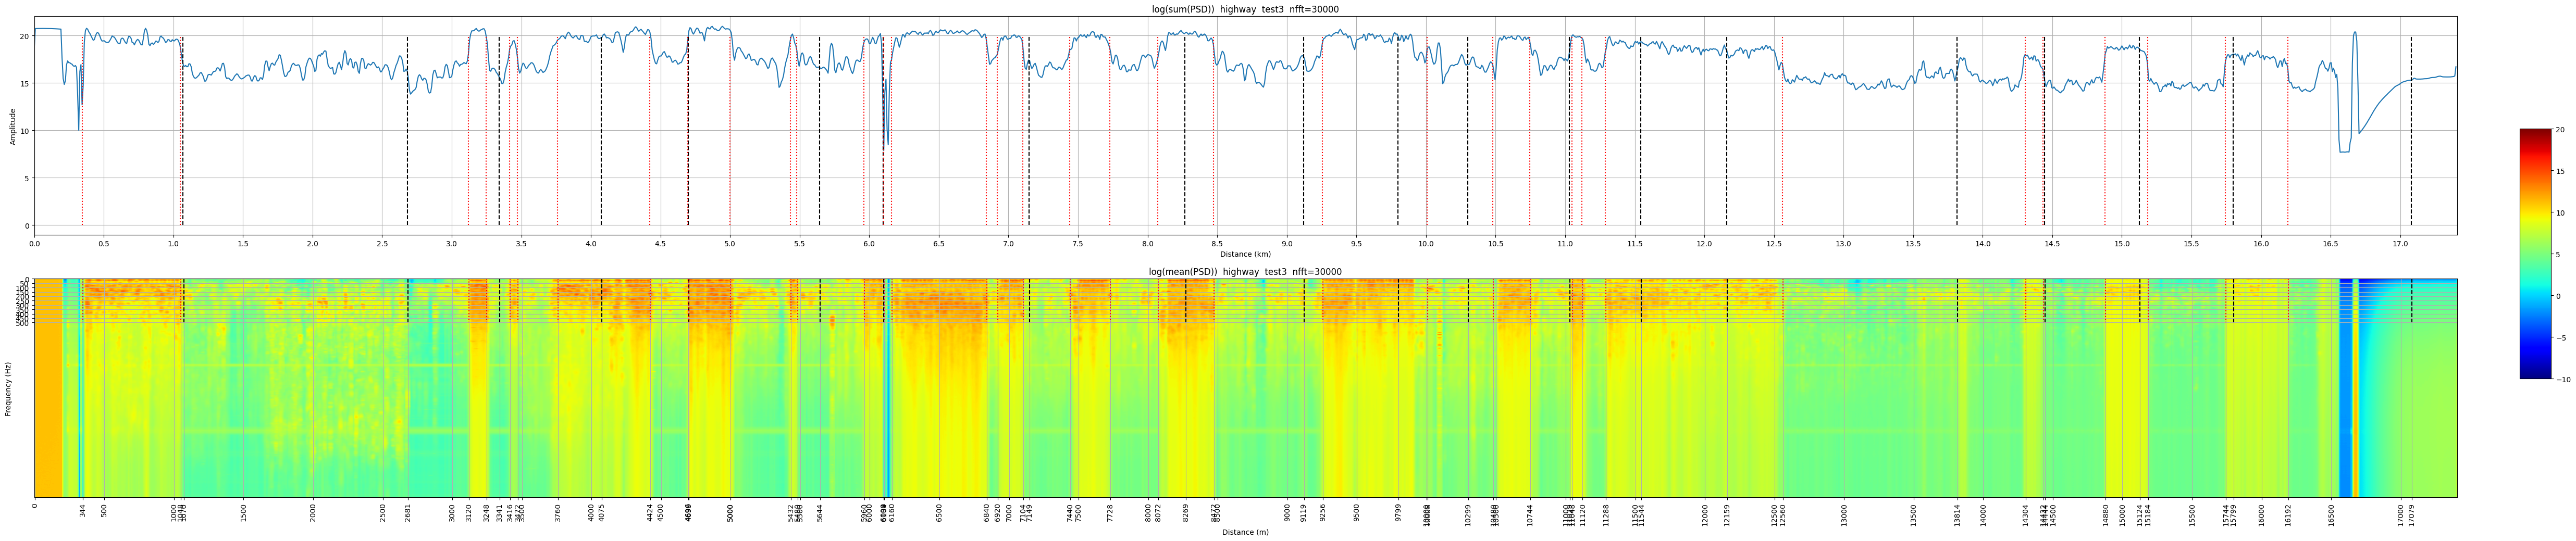

In [7]:
import DasBatch as db

mutation_stamp1 = [24, 29, 43, 99, 131, 170, 207, 330, 335, 390,406, 427, 434, 470, 531, 553, 587, 626, 667, 679, 715, 745, 765, 855, 888, 930, 966, 1009,
                  1018, 1059, 1069, 1085, 1107, 1157, 1238, 1251, 1260, 1310, 1343, 1350, 1381, 1400, 1411, 1570, 1697, 1730, 1788, 1804, 1860, 1898, 1968, 2024, 2054,  2068, 2084]
mutation_stamp = [        43,     131,              390,406, 427, 434,   470,     553, 587,    625,         679,  685,  745, 763, 770, 855, 865, 888, 930, 966, 1009,
                  1059, 1157, 1251,  1310, 1343,  1381, 1390, 1411, 1570, 1788, 1804, 1860, 1898, 1968, 2024]

# for i in mutation_stamp:
#     print(i*8)   
db.show_sum_and_psd('/mnt/f/Highway_2024_0510/output/psd_5_20_v0/test03_05_10_all_psd.hdf5' , 
                    ch_list =  range(0,2176) , 
                    dis_spacing = 8, 
                    title =  "highway  test3  nfft=30000", 
                    save_path= "/mnt/f/Highway_2024_0510/output/test3_subplot8_",
                    # mutation_th= 4,
                    mutations= mutation_stamp,
                    darkline= [1.070,2.681,3.341,4.076,4.699,5.644,6.099,7.149,8.269,9.119,9.799,10.299,11.029,11.544,12.159,13.814,14.444,15.124,15.799,17.079])


In [ ]:
%matplotlib inline
import glob

flist = glob.glob('/mnt/f/Highway_2024_0510/test03_05_10/*.h5')
flist.sort()
print(len(flist))

path = '/mnt/f/Highway_2024_0510/output/cb_fig_5_13/'
if not os.path.exists(path):
    os.makedirs(path)

print(int(len(flist)/10))

# db.show_concat(flist , 0,  len(flist), 10,
#                title = "channel balence before" , 
#                decimate= 1,
#                clim_rate= 20,
#                save_path = path,
#                N = 30*1000)

db.show_concat_channel_balenced(flist = flist ,
                            psdh5file= '/mnt/f/Highway_2024_0510/output/psd_5_11_v3/test03_05_10_all_psd.hdf5'  , 
                            start = 16, stop= len(flist), step =4,
                            title = "highway test3 channel balence " , 
                            decimate= 1,
                            clim_rate= 50,
                            save_path = path,
                            N = 30*1000)



In [ ]:
from pykml import parser
import json
import numpy as np
from geopy.distance import geodesic
 
aa = geodesic((30.28708, 120.12802999999997), (28.7427, 115.86572000000001)).km  #
# with open("/mnt/f/Highway_2024_0510/二期轨迹.kml" , "rt") as f:
#     doc = parser.parse(f)
#     root = doc.getroot()
#     print(root.keys())
#     for pm in doc.getroot().Document.Folder.Placemark:
#         print(pm.name )

def find_nearest_element(arr, target):
    arr = np.array(arr)
    # target *= 8
    # target +=720
    idx = np.abs(arr - target).argmin()
    return idx

cum_dis =  [1070,2681,3341,4076,4699,5644,6099,7149,8269,9119,9799,10299,11029,11544,12159,13814,14444,15124,15799,17079]
cum_length = [960,2440,3040,3720,4240,5100,5460,6040,7100,7920,8480,9040,9660,10120,10630,12080,12720,13320,13920,14880]
cum_offset = [cum_dis[i] - cum_length[i] for i in range(len(cum_length))]
d_cum_offset = [110]+[ cum_offset[i] - cum_offset[i-1] for i in range(1,len(cum_length))]

slope, intercept = np.polyfit(cum_length, cum_dis, 1)
print(slope , intercept)
# print(len(d_cum_offset))
o = 0

mutation_stamp = [ 43,  131, 390,406, 427, 434,   470, 553, 587,    625,    679,  685,  745, 763, 770, 855, 865, 888, 930, 966, 1009,
                  1059, 1157, 1251,  1310, 1343,  1381, 1390, 1411, 1570, 1788, 1804, 1860, 1898, 1968, 2024]

with open("/mnt/f/Highway_2024_0510/打点3.jsn" , "r",encoding='utf-8-sig') as f:
    load_dict = json.load(f)
    pointlist = load_dict['ObjItems'][0]['Object']['ObjectDetail']["ObjChildren"]
    pointll = []
    for pointjsn in pointlist:
        pointll.append( (pointjsn['Object']['ObjectDetail']['Lat'] , pointjsn['Object']['ObjectDetail']['Lng'] ) )
    pointll.sort(key=lambda x: x[1])    
    pointdis  = []
    sum_len_list = []
    sum_dis = 0
    sum_len = 0
    # print(len(pointll))
    for i in range(67,len(pointll) - 1):
        sum_dis += geodesic(pointll[i] , pointll[i+1]).m

        # if o < len(cum_dis) and sum_len >= cum_length[o]:
        #     sum_len += d_cum_offset[o]
        #     o += 1

        if sum_dis > 7000:
            sum_len = 1.13*sum_dis - 130
        elif sum_dis > 4136:
            sum_len = 1.13*sum_dis  
        else:
            sum_len = 1.13*sum_dis  + 130
        # if sum_dis > 8000:
        #     sum_len = 1.1*sum_dis
        # if sum_dis > 4136:
        #     sum_len = 1.13*sum_dis  
        # else:
        #     sum_len = 1.1*sum_dis+200


        sum_len_list.append(sum_len)
        pointdis.append((pointll[i] , pointll[i+1], sum_len ,sum_dis))
            # print(i , o)

    print(0 , ' ', pointdis[0][0][1] , ' ' , pointdis[0][0][0] , ' ' , 5 , ' ' , 0)
    for i in range(len(pointdis)):
        print('%d'%pointdis[i][2] , ' ', pointdis[i][1][1] , ' ' , pointdis[i][1][0] , ' ' , 5 , ' ' , pointdis[i][3])

    mutation_ll = []
    for chennle in mutation_stamp:
        dis = chennle *8 

        idx = find_nearest_element(sum_len_list , dis)
        if sum_len_list[idx] <= dis:
            idx +=1

            
        rate = ( dis - sum_len_list[idx -1] ) / (sum_len_list[idx] - sum_len_list[idx -1])
        print(rate,idx ,sum_len_list[idx] , dis ,  sum_len_list[idx -1])
        ll =( rate*(pointdis[idx][1][0] - pointdis[idx][0][0] )  + pointdis[idx][0][0] , rate*(pointdis[idx][1][1] - pointdis[idx][0][1] )  + pointdis[idx][0][1] )
        
        check_dis = geodesic(pointdis[idx][0] , ll).m
        mutation_ll.append( [ pointdis[idx][0] , ll , dis])

    k = 0
    for i in range(len(mutation_ll)):
        print('%d'%mutation_ll[i][2] , ' ', mutation_ll[i][1][1] , ' ' , mutation_ll[i][1][0] , ' ' , 4 + (k%2)*2)
        k+=1


In [ ]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt

path = '/mnt/f/Highway_2024_0510/output/psd_5_20_v0/'
if not os.path.exists(path):
    os.makedirs(path)

mutation_stamp = [ 43, 131,  390,406, 427, 434,   470,     553, 587,    625,  679,  685,  745, 763, 770, 855, 865, 888, 930, 966, 1009,
                  1059, 1157, 1251,  1310, 1343,  1381, 1390, 1411, 1570, 1788, 1804, 1860, 1898, 1968, 2024]

ch_list =[ (mutation_stamp[i]+mutation_stamp[i+1])//2 for i in range(0,len(mutation_stamp) , 2)]
print(ch_list)
for ch in ch_list:
    psd = []
    all_time = []
    for fi in range(0,2):
        with h5py.File('/mnt/f/Highway_2024_0510/output/psd_5_11_v3/test03_05_10_'+str(fi)+'.hdf5', 'r') as f:
            # print(f.keys())
            if len(f[str(ch)].keys()) == 1 :
                dset = f[str(ch)]['01']
            else:
                dset = f[str(ch)]
            time = [key for key in dset.keys()]
            # print(time)
            # start = time.index('20:00:12')
            # time = time[start:]+time[:start]
            # print(time)

            psd.append(  [dset[key][:] for key in time])
            all_time.append(time[:])
            f.close()
    print("-----------read",ch,"------------")
    
    print(len(psd))
    print(len(all_time))
    psd = np.concatenate(psd)
    time = np.concatenate(all_time)
    print(psd.shape)
    print(len(time))
    psd = np.log(np.sum(psd,axis=0))
    print(psd.shape)

    plt.figure(figsize=(30,10))
    plt.plot(psd)
    # plt.imshow(psd.T, aspect='auto', cmap='viridis')
    plt.grid(alpha = 1)

    xstick = [300*i for i in range(10)]
    # print(f['frequency'].shape)

    # plt.xticks(xstick , [time[i][:2]+" "+time[i][3:]  for i in xstick],rotation = 0)

    plt.xticks(xstick , ['%d'% (i/3.)  for i in xstick])
    plt.xlabel("Frequency")
    plt.ylabel("Amptitude")
    plt.title("log(PSD) Highway 5.10 Channel="+str(ch)+" nfft=6000")
    plt.savefig('/mnt/f/Highway_2024_0510/output/psd_5_20_v0/test03_ch_'+str(ch)+'_psd.png') #10s per pic
    plt.show()

    plt.close()




-----------read 130 ------------
176
(2200, 15001)
12
(15001,)


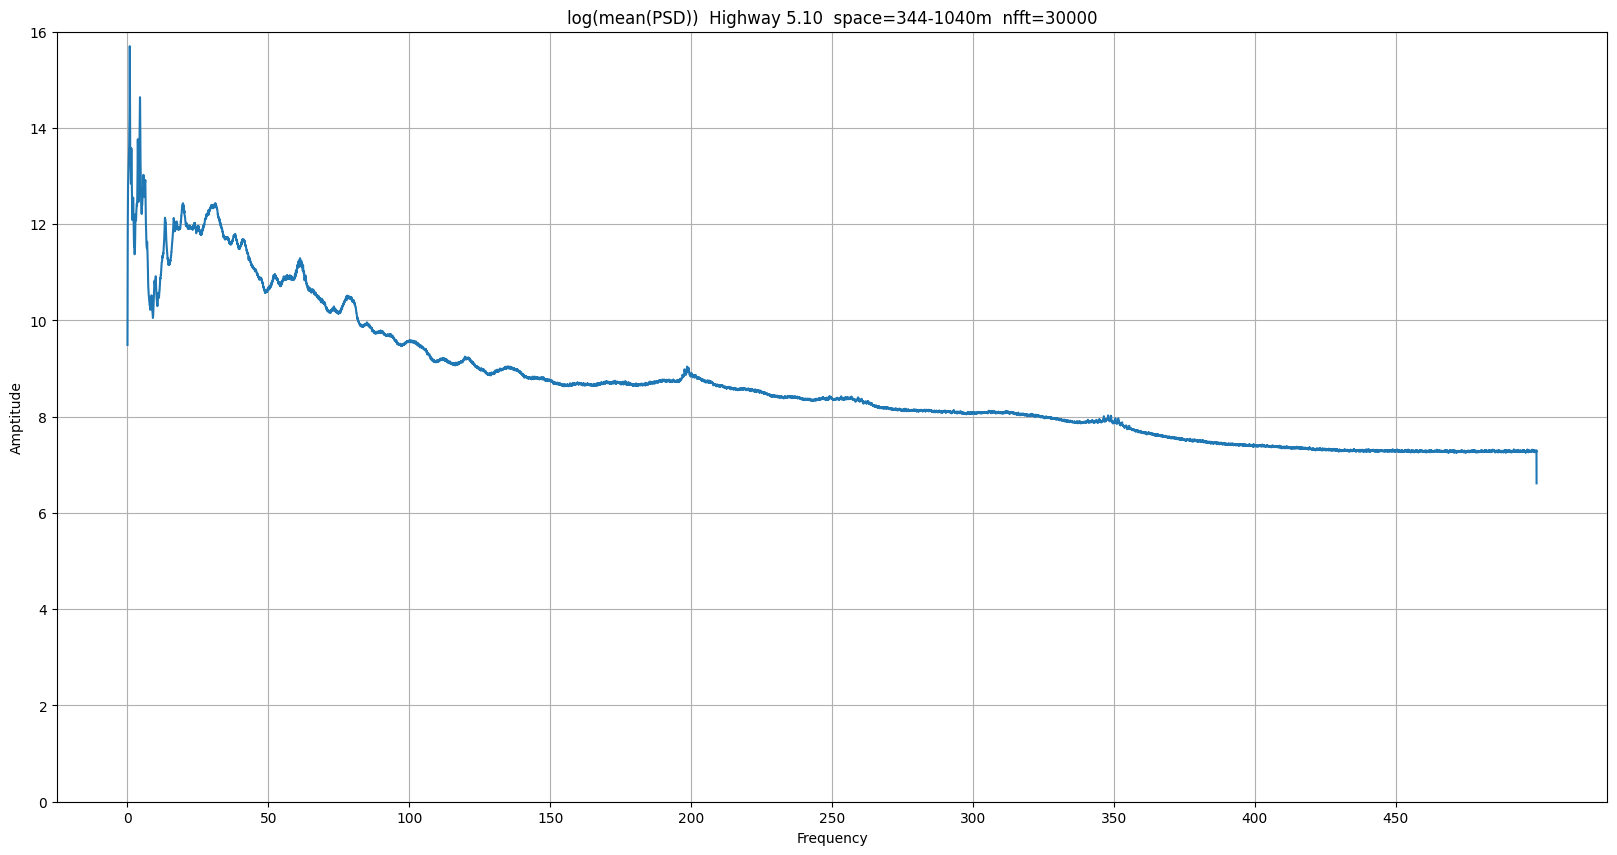

-----------read 389 ------------
518
(6475, 15001)
12
(15001,)


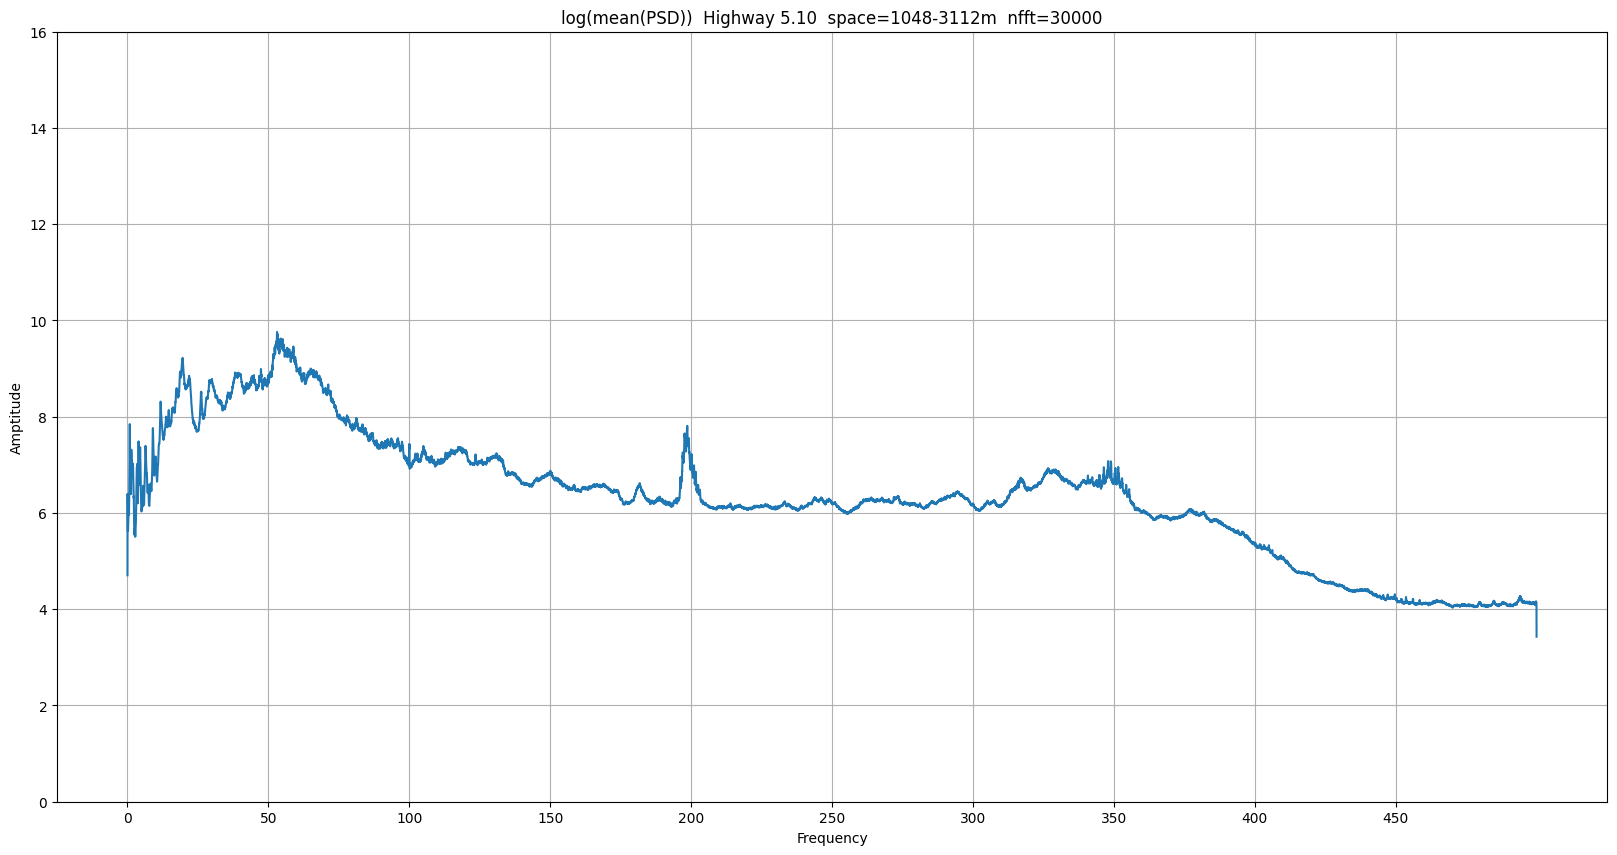

-----------read 405 ------------
32
(400, 15001)
12
(15001,)


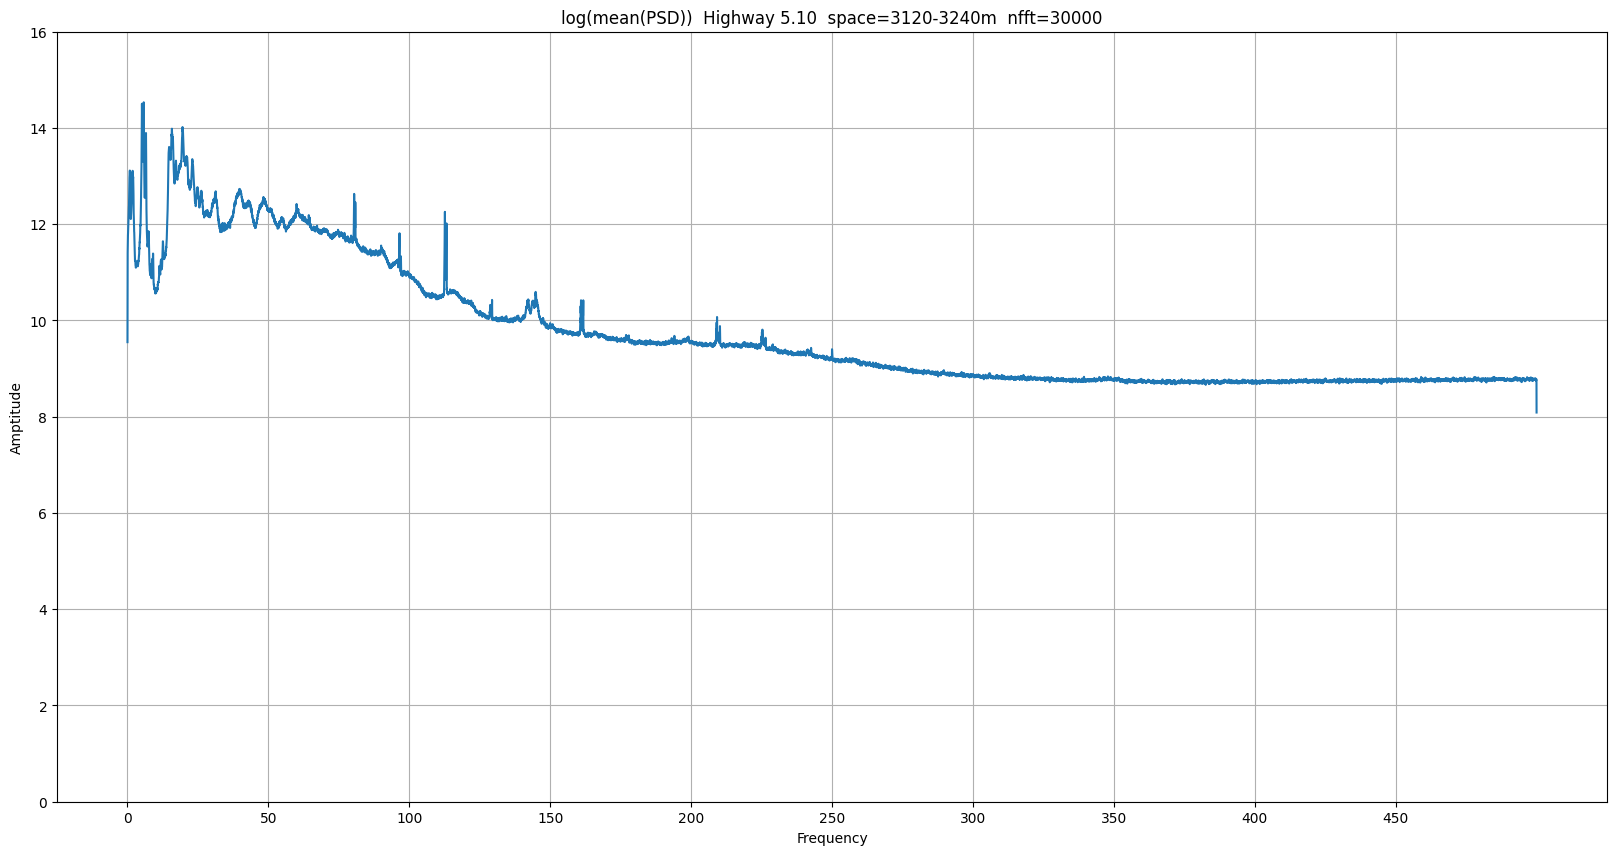

-----------read 426 ------------
42
(525, 15001)
12
(15001,)


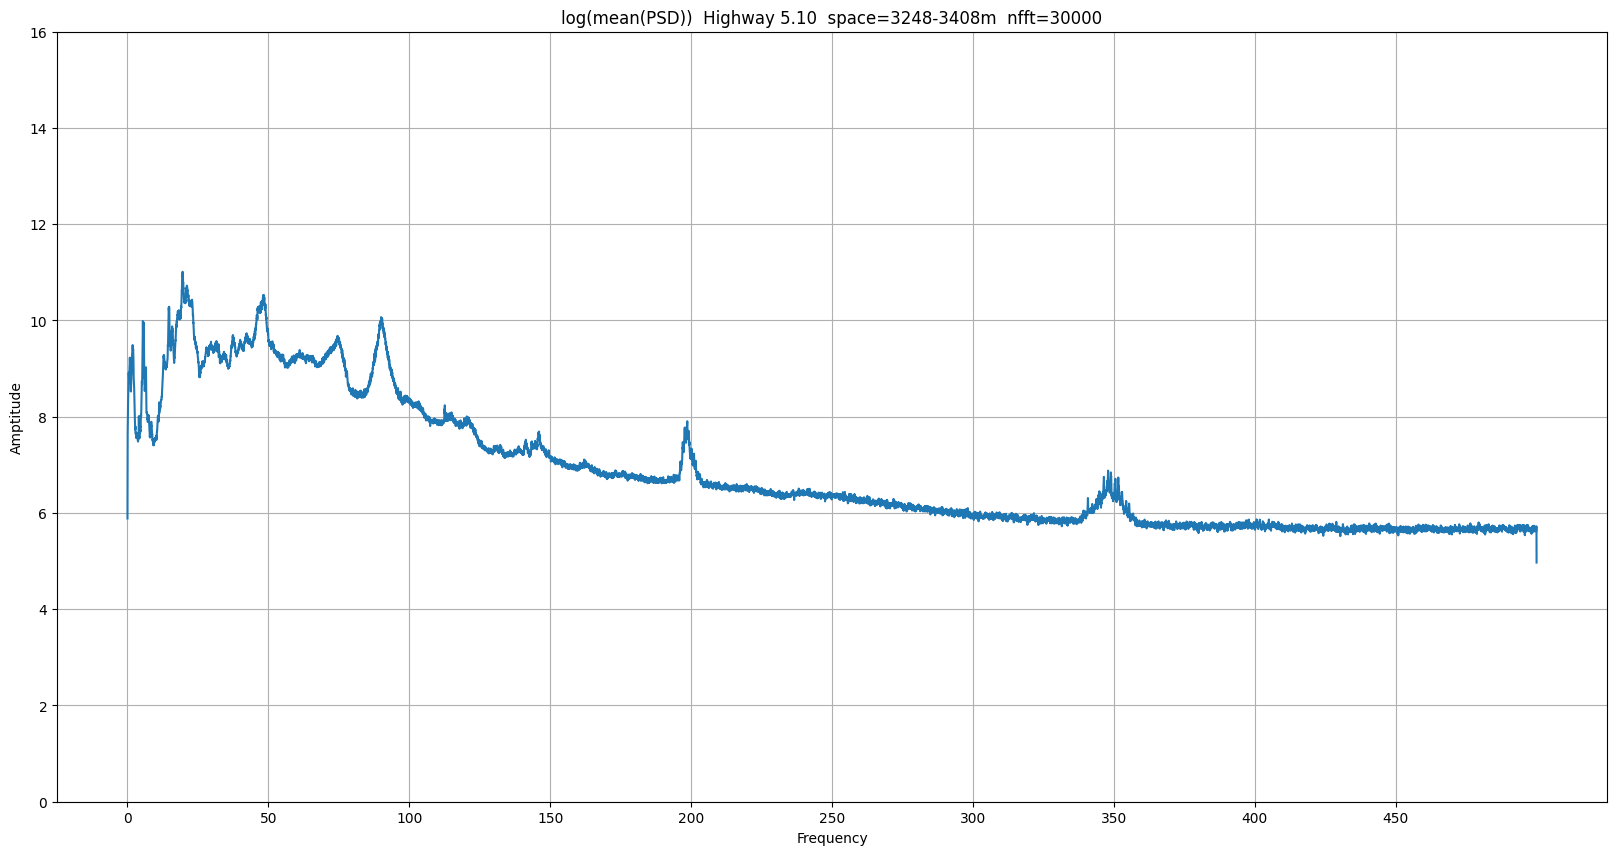

-----------read 433 ------------
14
(175, 15001)
12
(15001,)


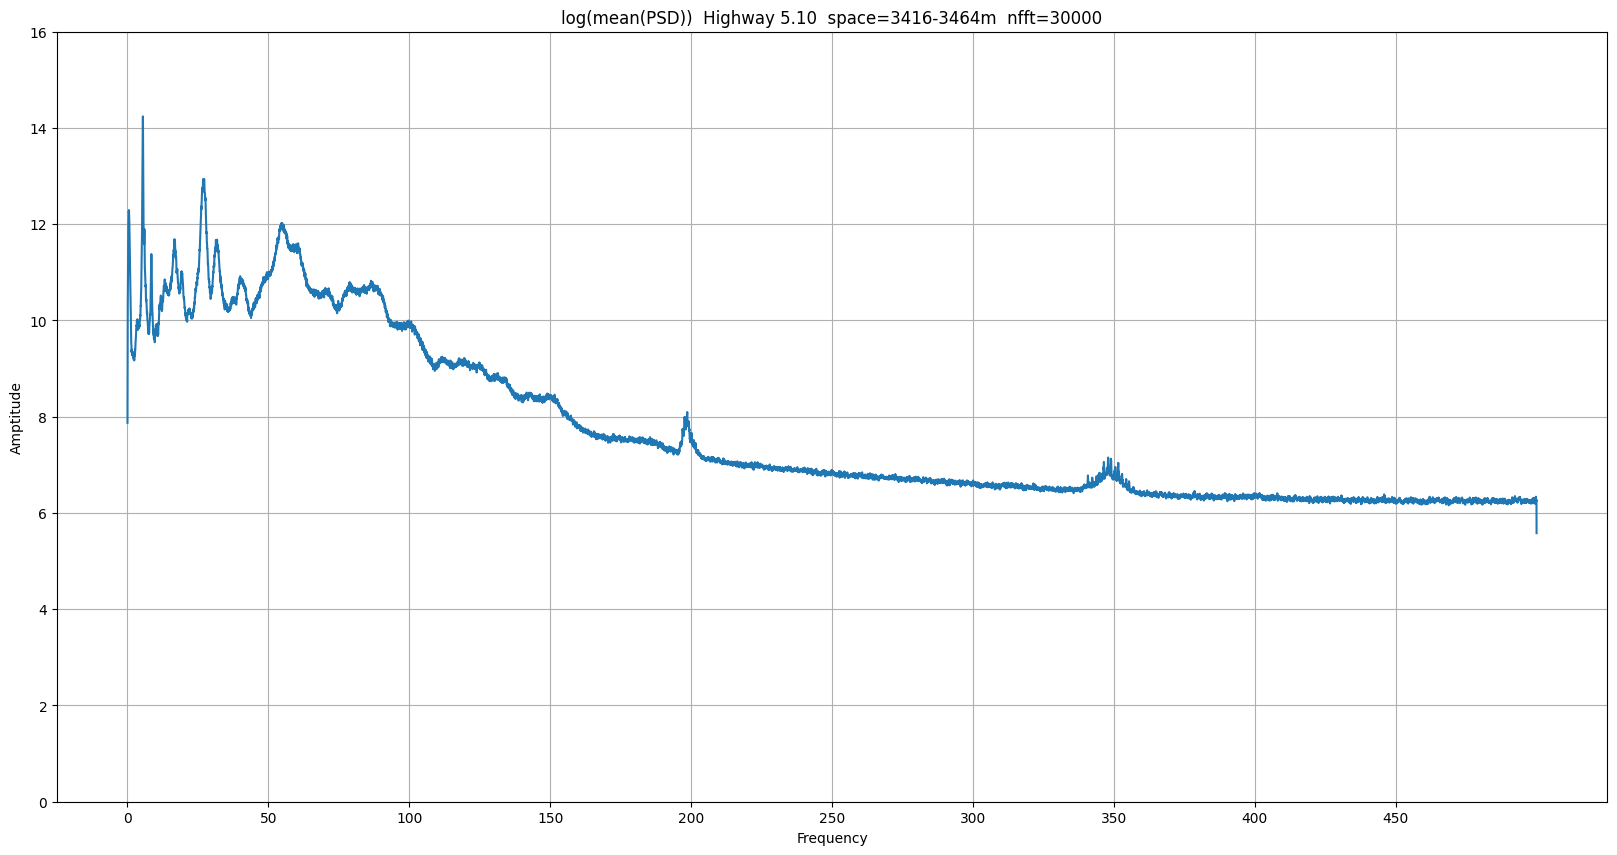

-----------read 469 ------------
72
(900, 15001)
12
(15001,)


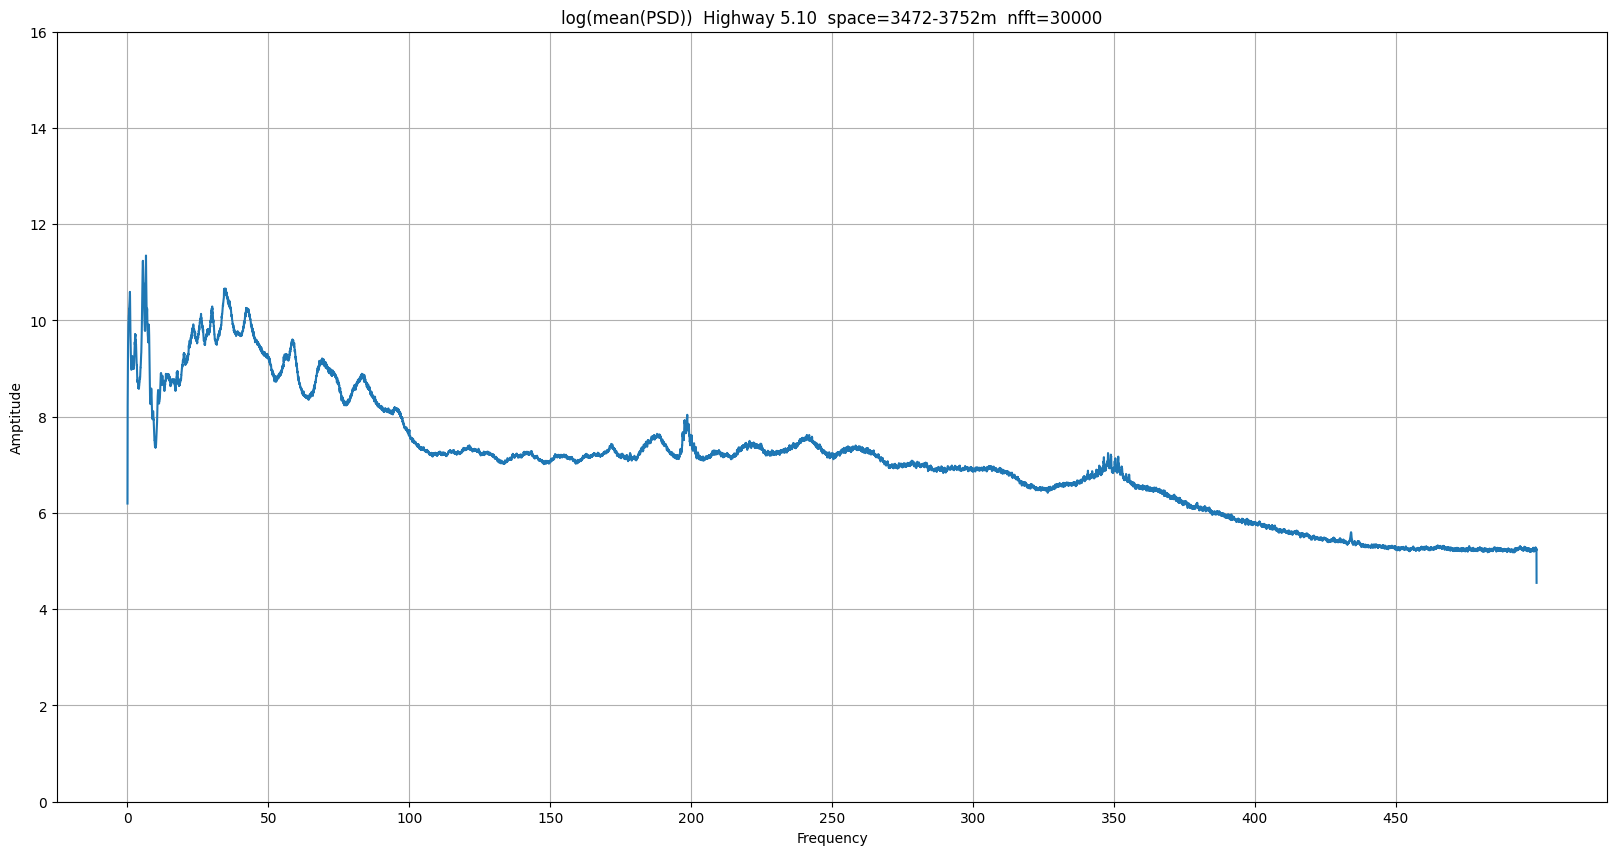

-----------read 552 ------------
166
(2075, 15001)
12
(15001,)


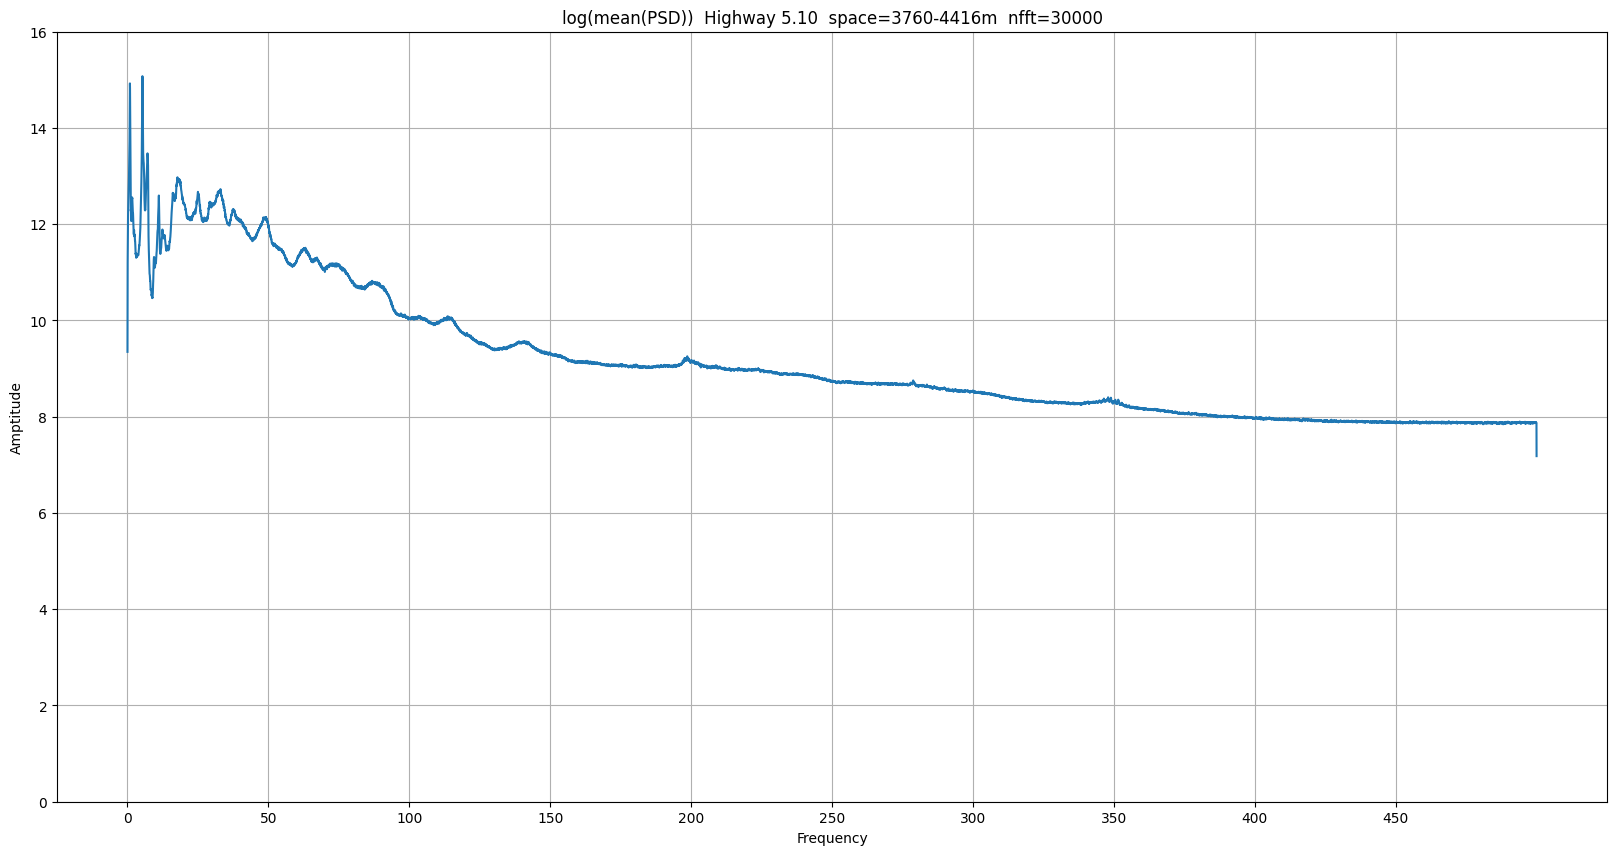

-----------read 586 ------------
68
(850, 15001)
12
(15001,)


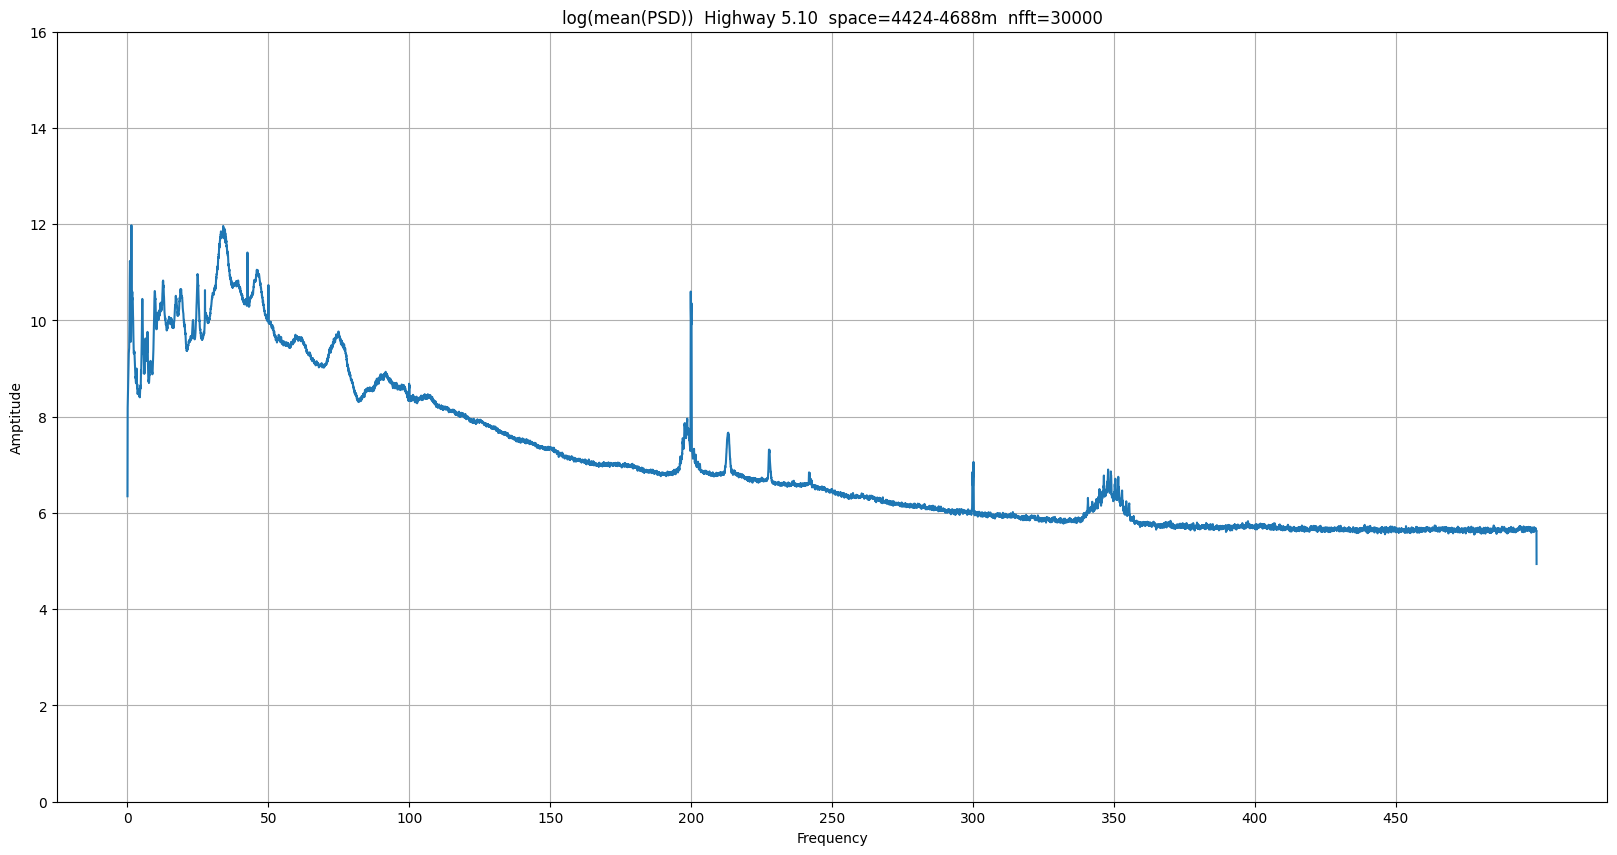

-----------read 624 ------------
76
(950, 15001)
12
(15001,)


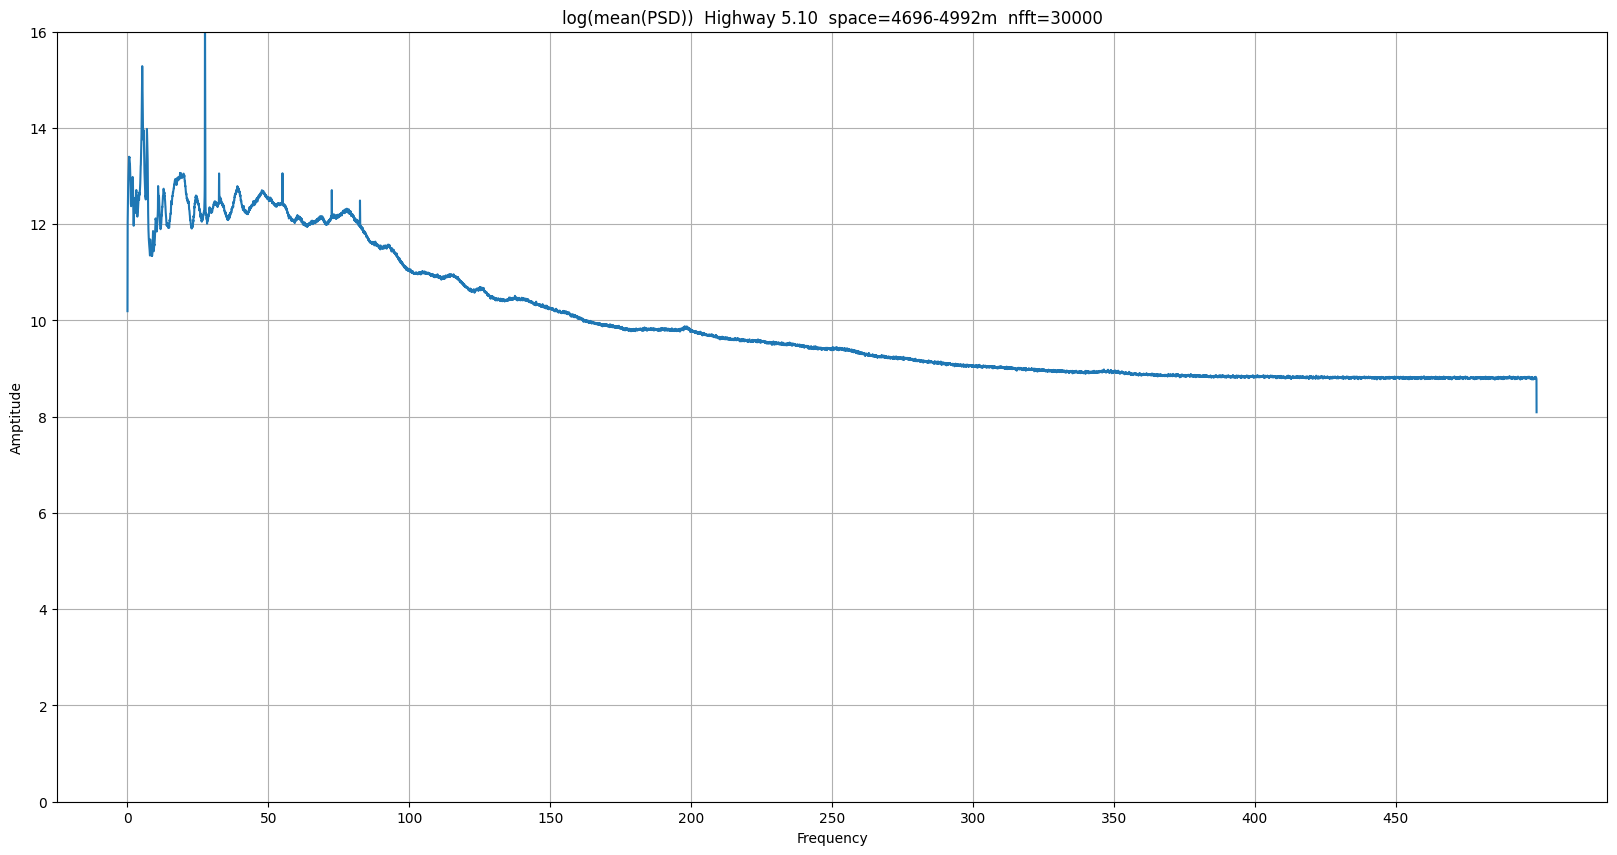

-----------read 678 ------------
108
(1350, 15001)
12
(15001,)


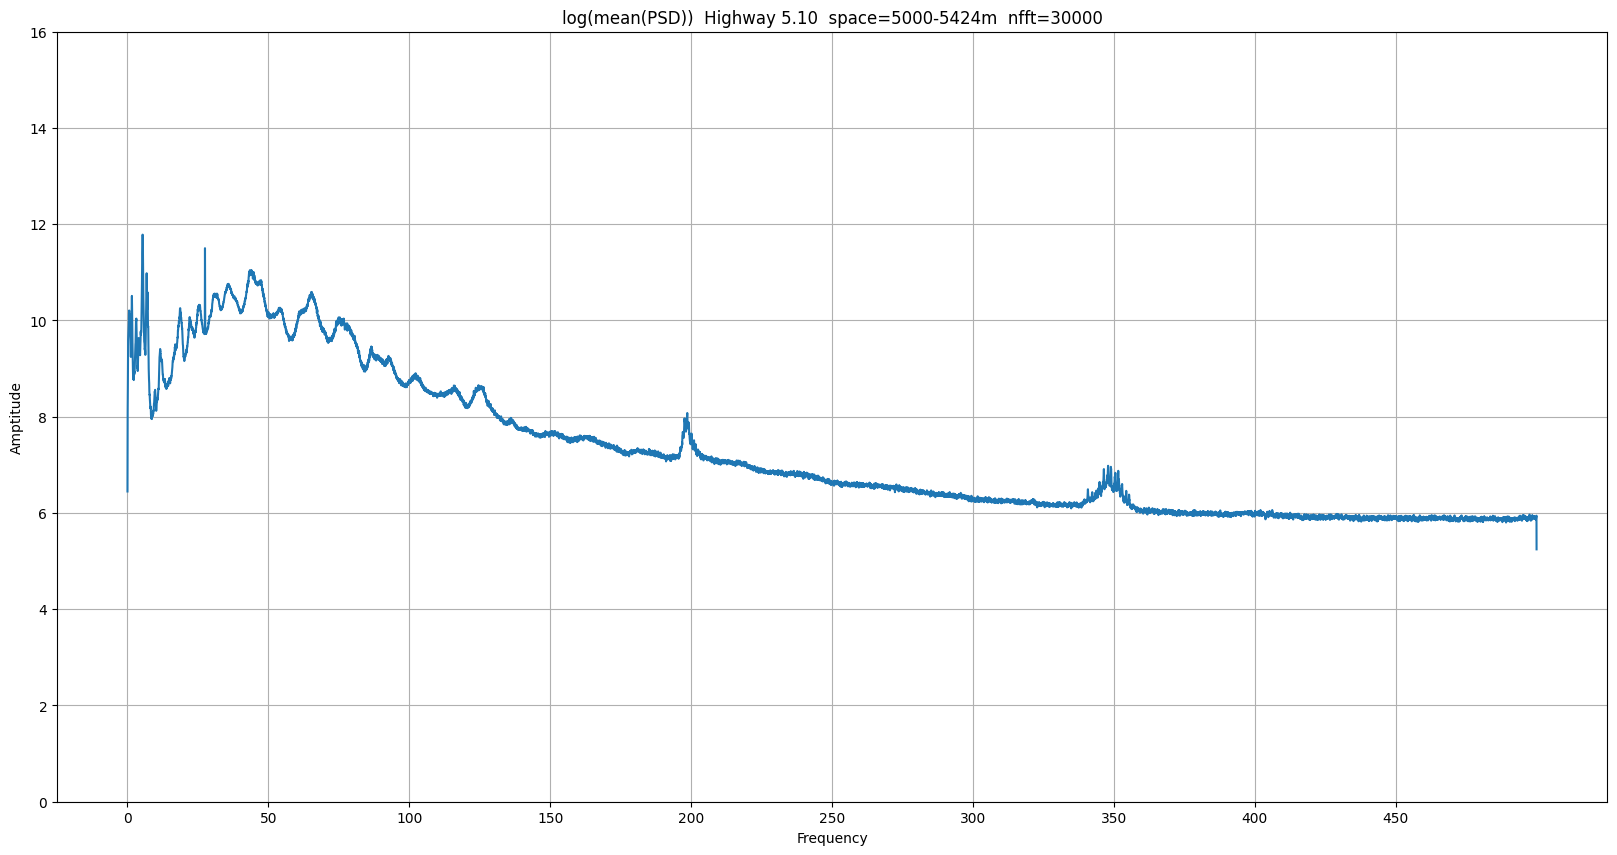

-----------read 684 ------------
12
(150, 15001)
12
(15001,)


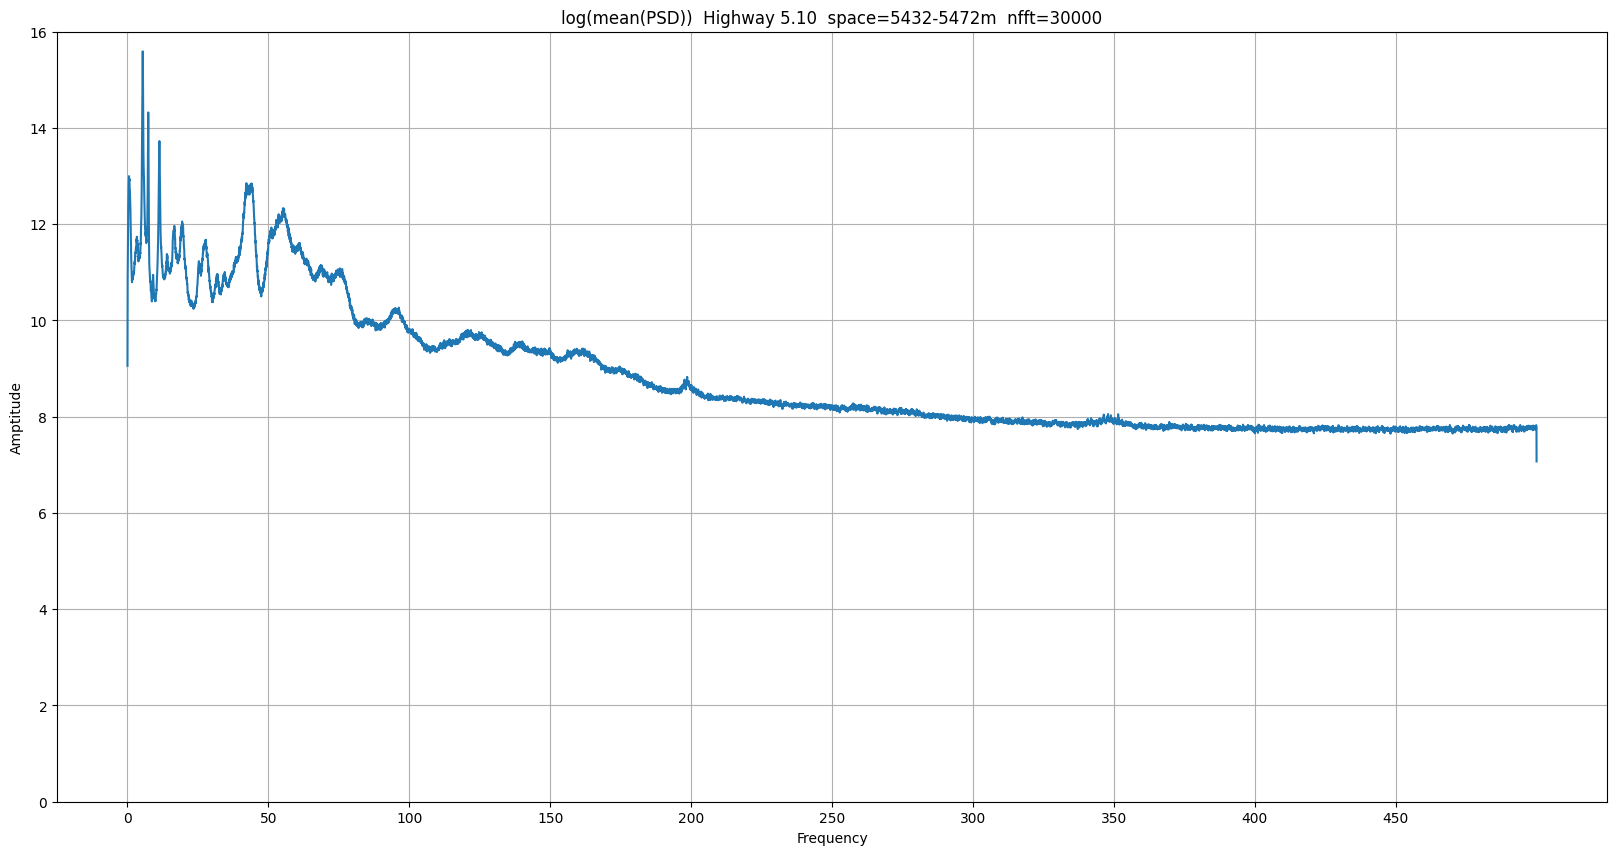

-----------read 744 ------------
120
(1500, 15001)
12
(15001,)


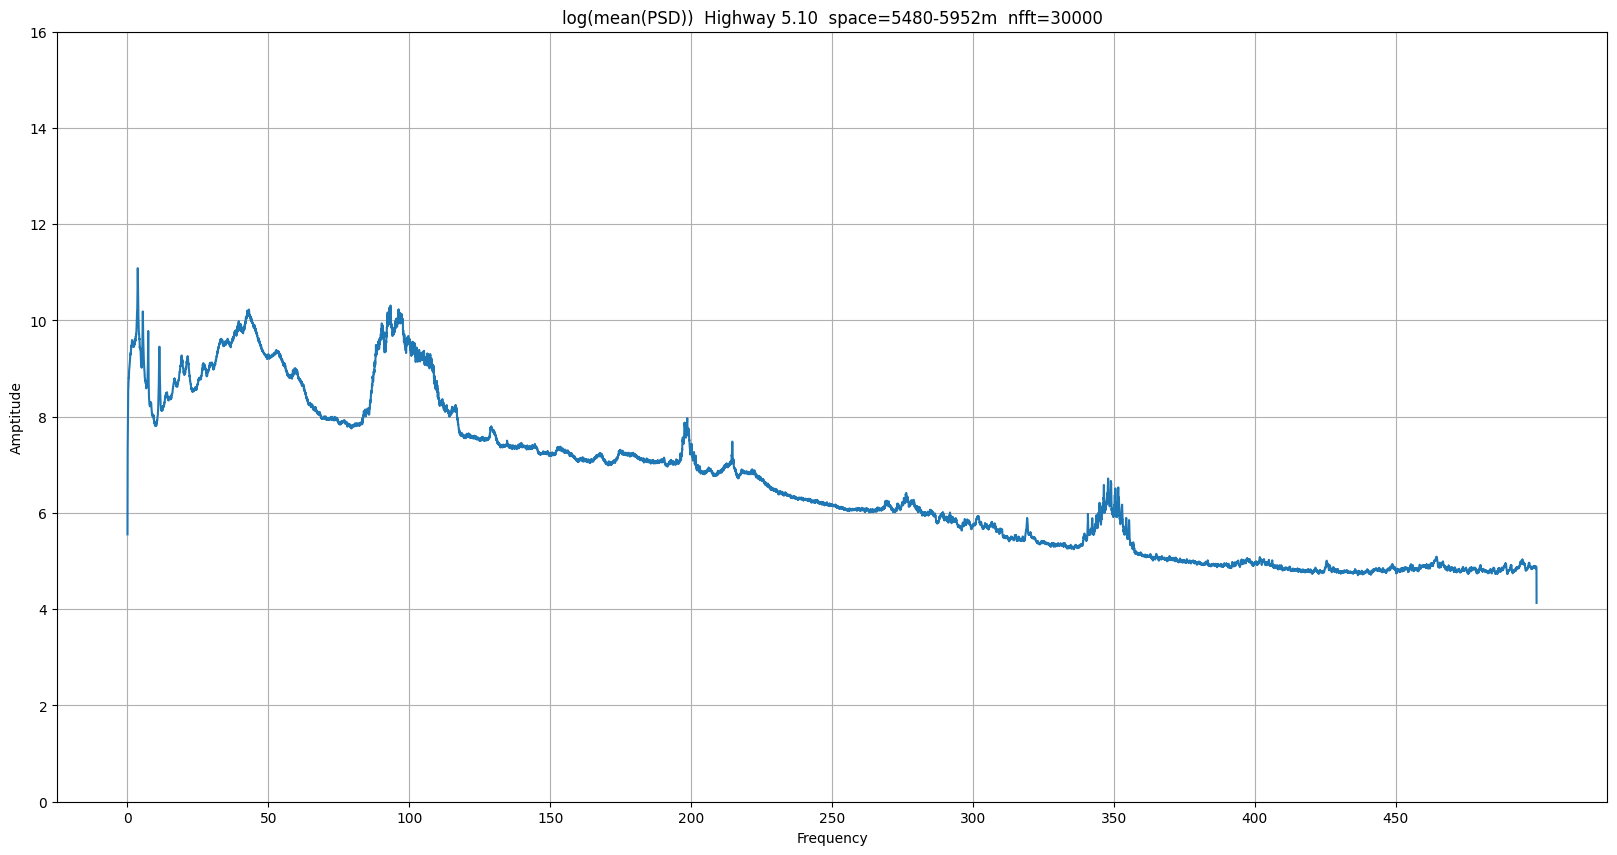

-----------read 762 ------------
36
(450, 15001)
12
(15001,)


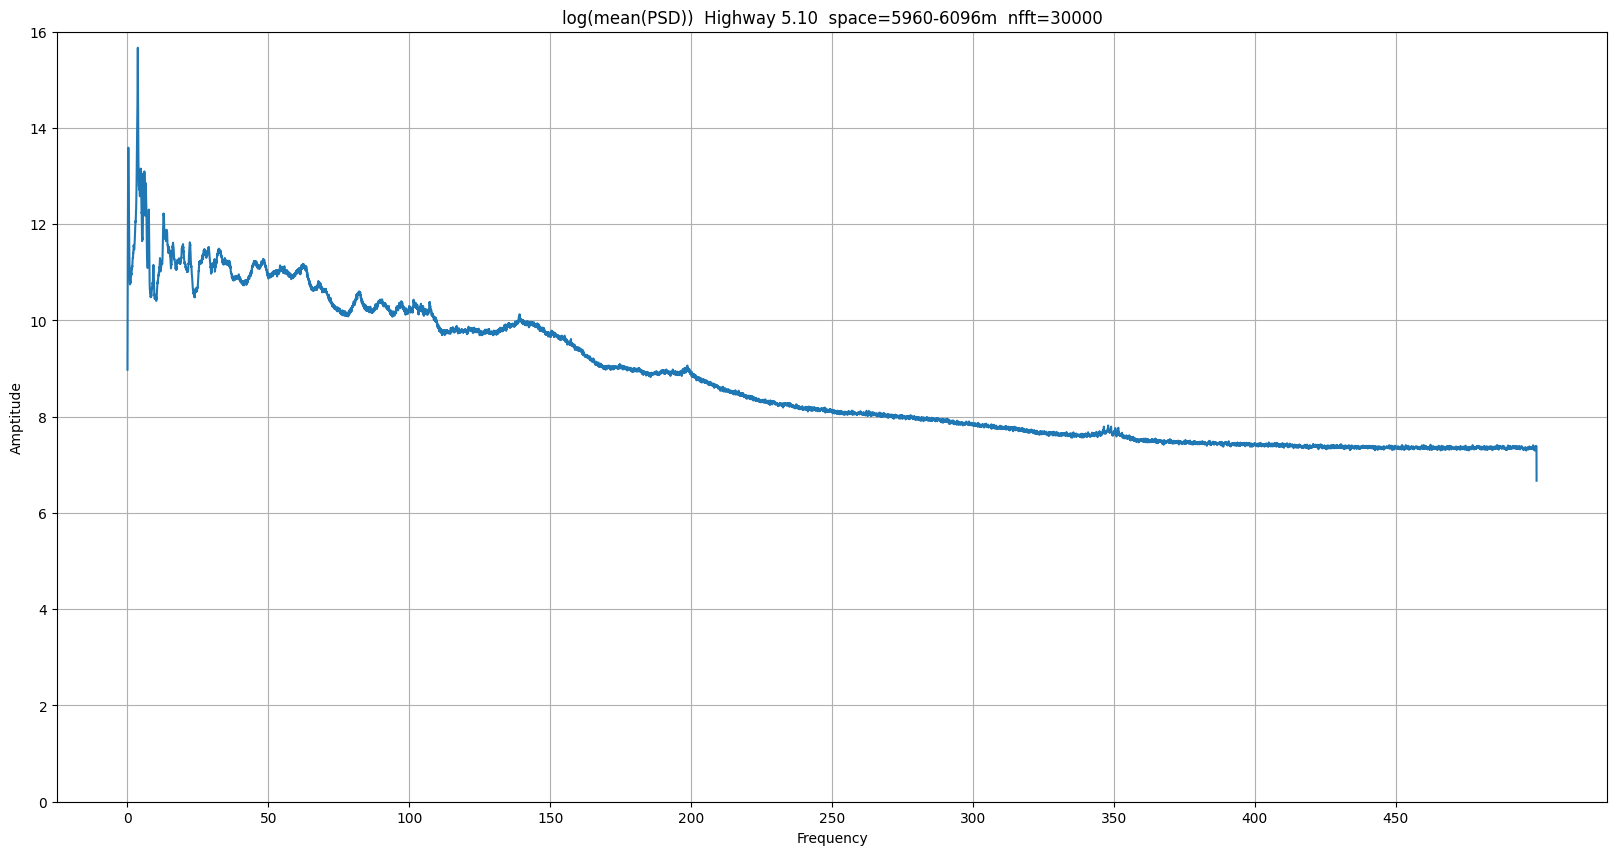

-----------read 769 ------------
14
(175, 15001)
12
(15001,)


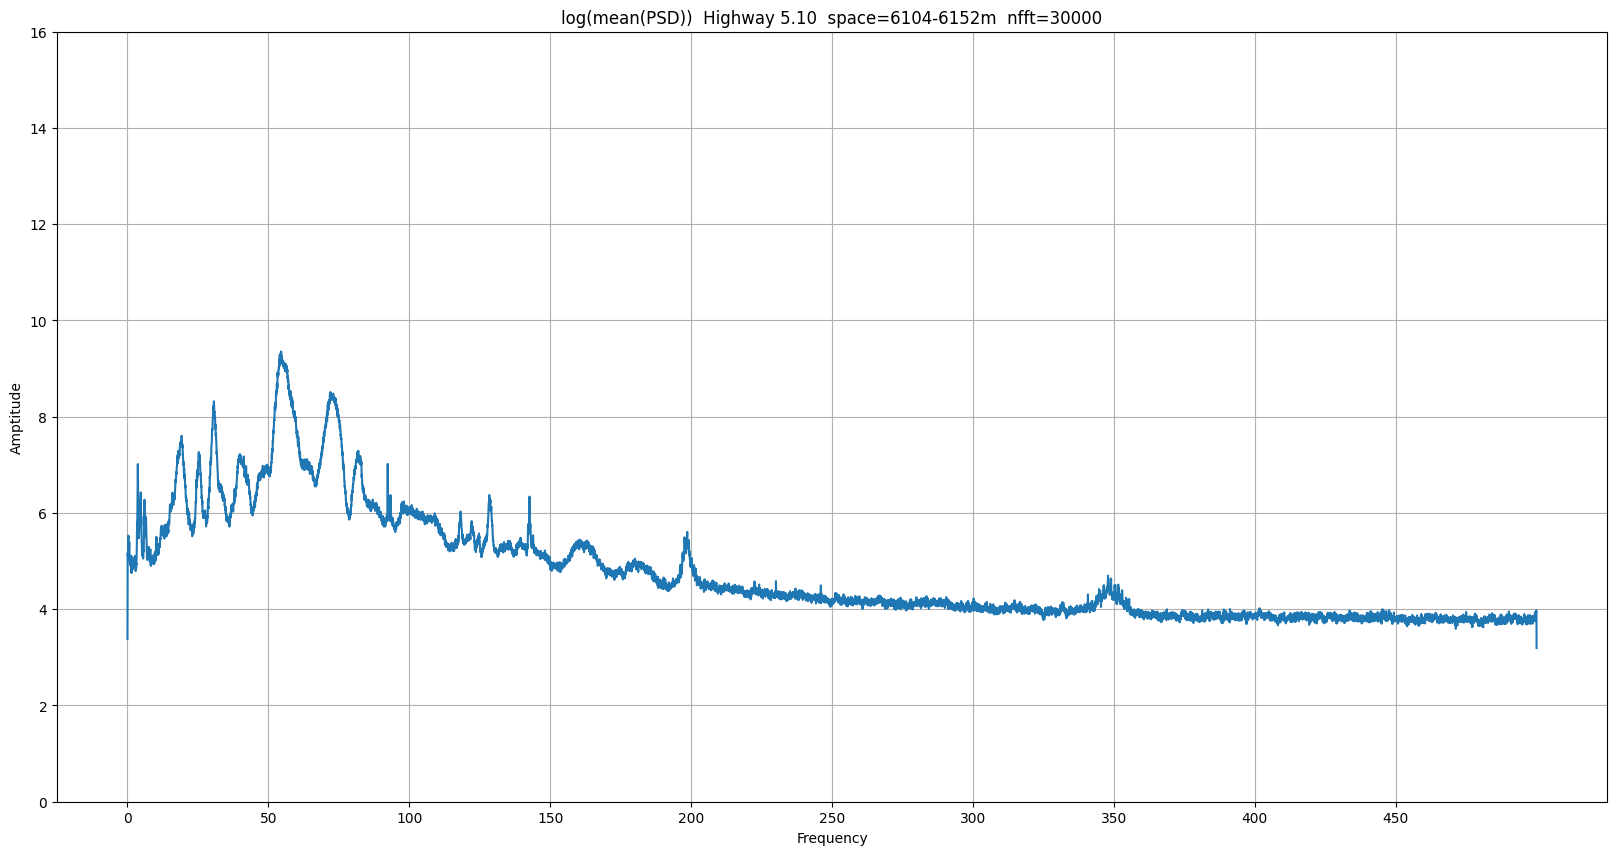

-----------read 854 ------------
170
(2125, 15001)
12
(15001,)


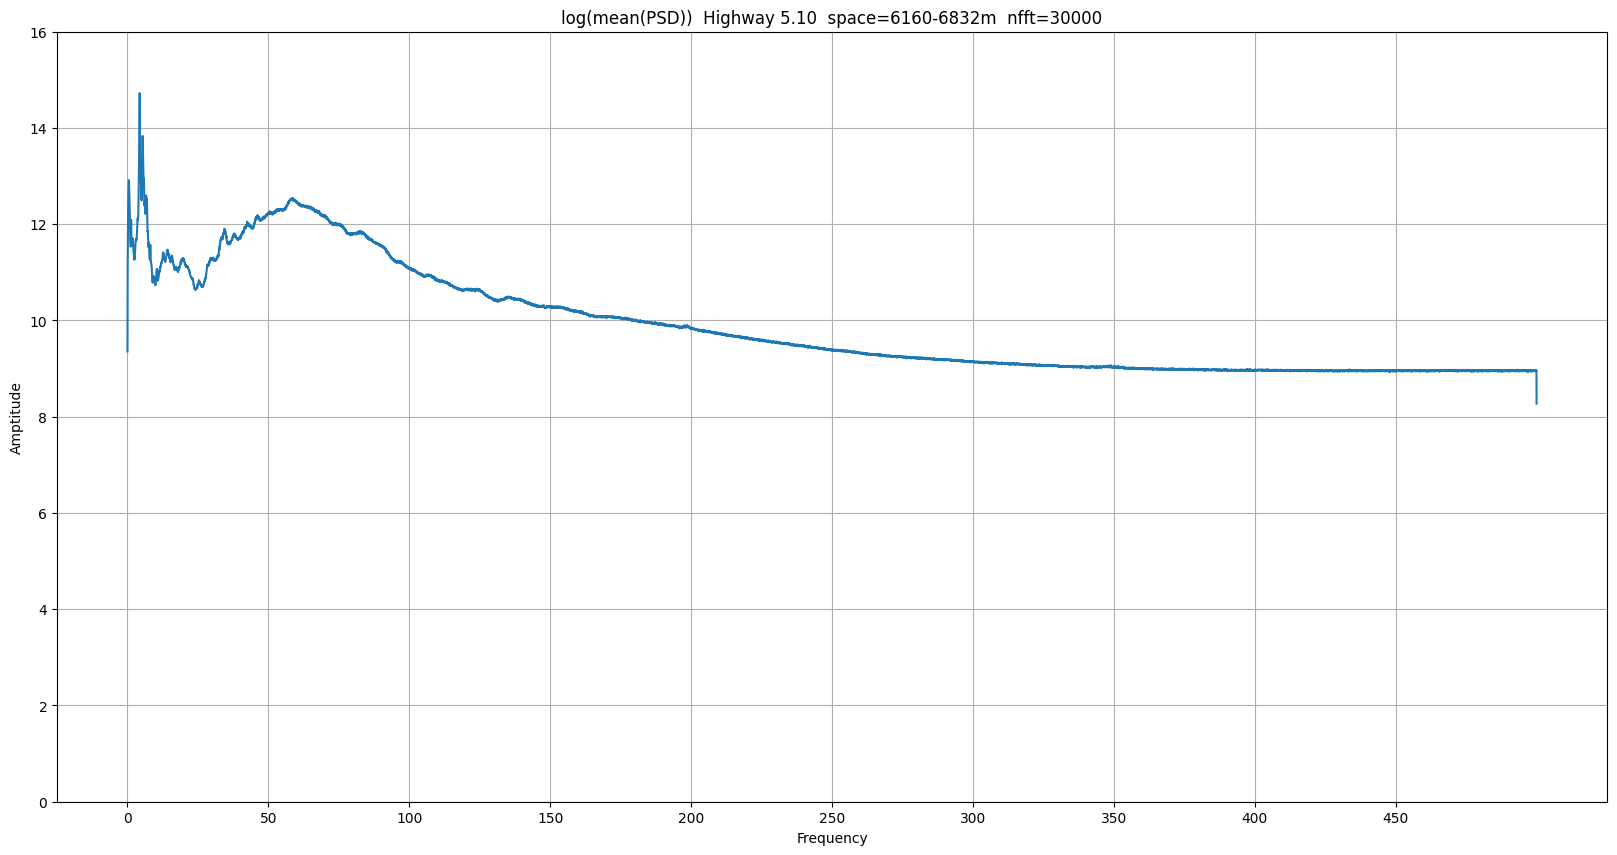

-----------read 864 ------------
20
(250, 15001)
12
(15001,)


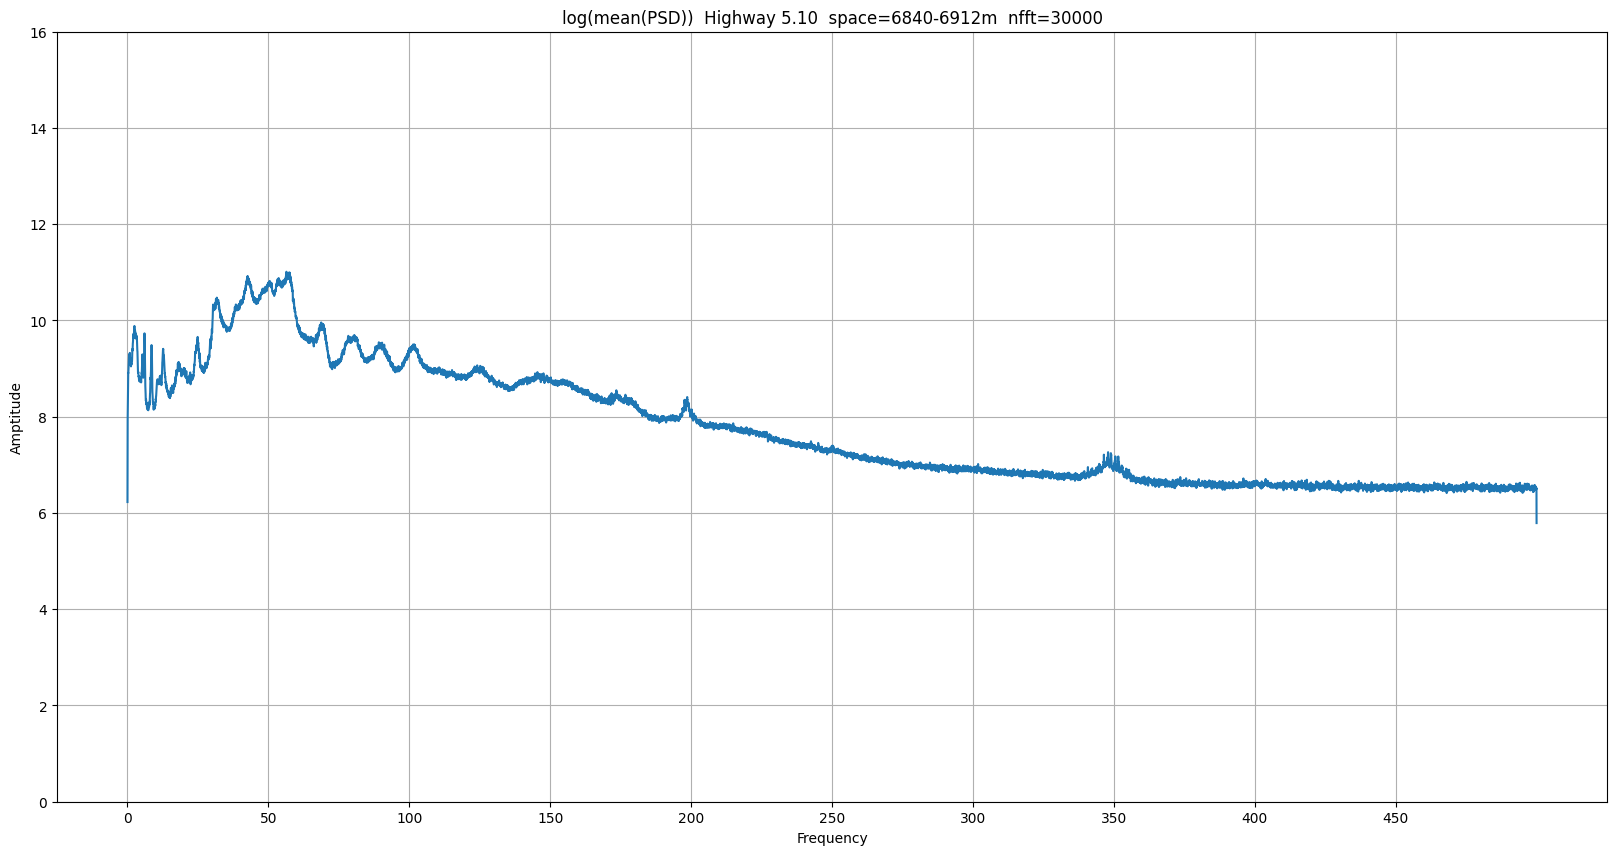

-----------read 887 ------------
46
(575, 15001)
12
(15001,)


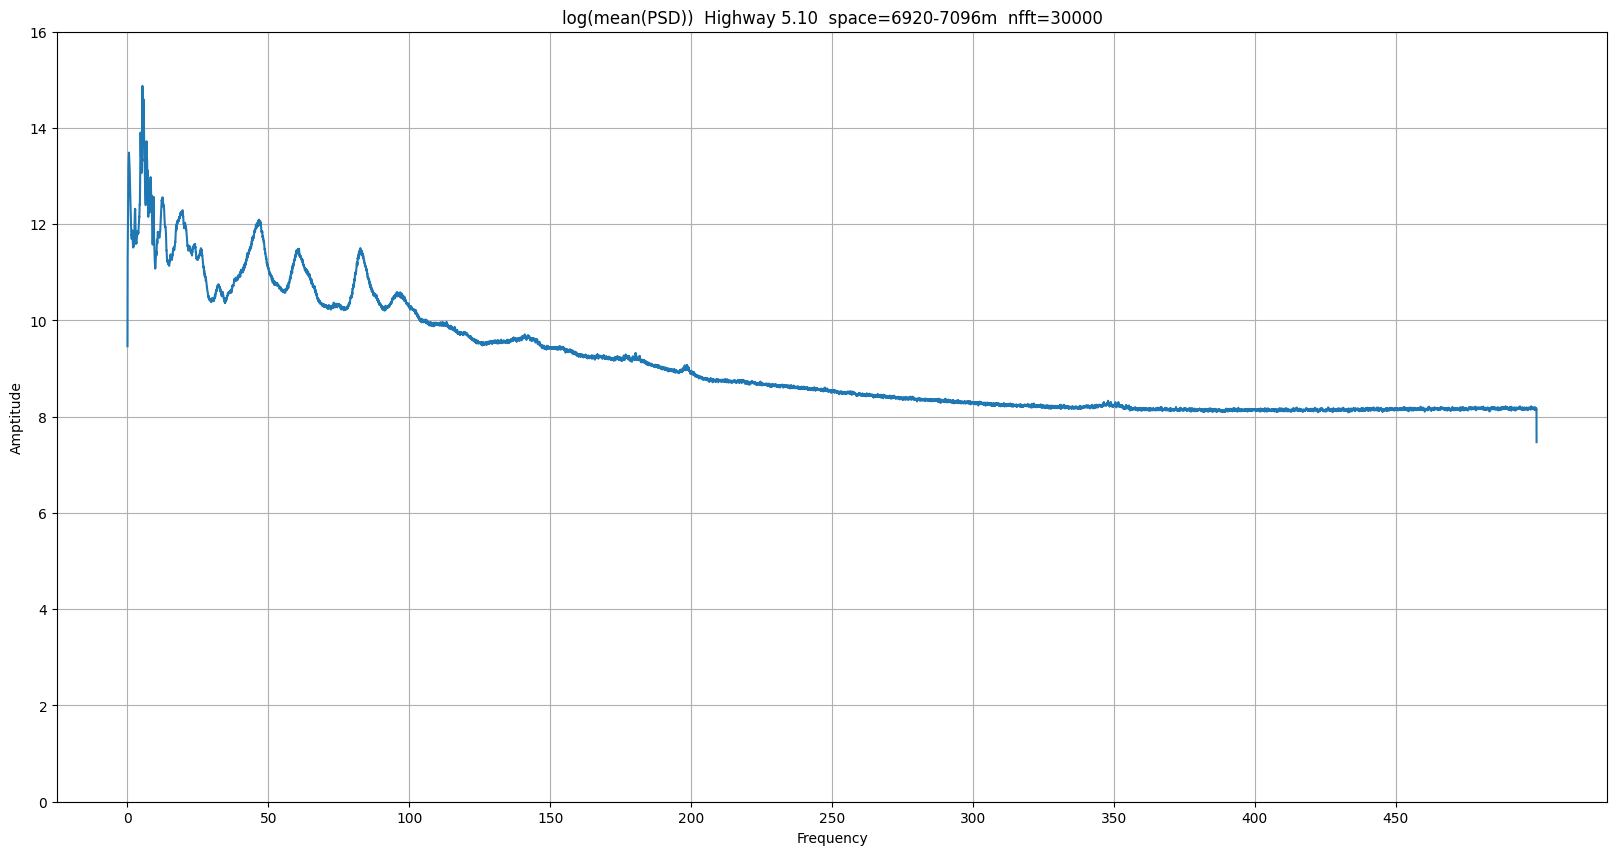

-----------read 929 ------------
84
(1050, 15001)
12
(15001,)


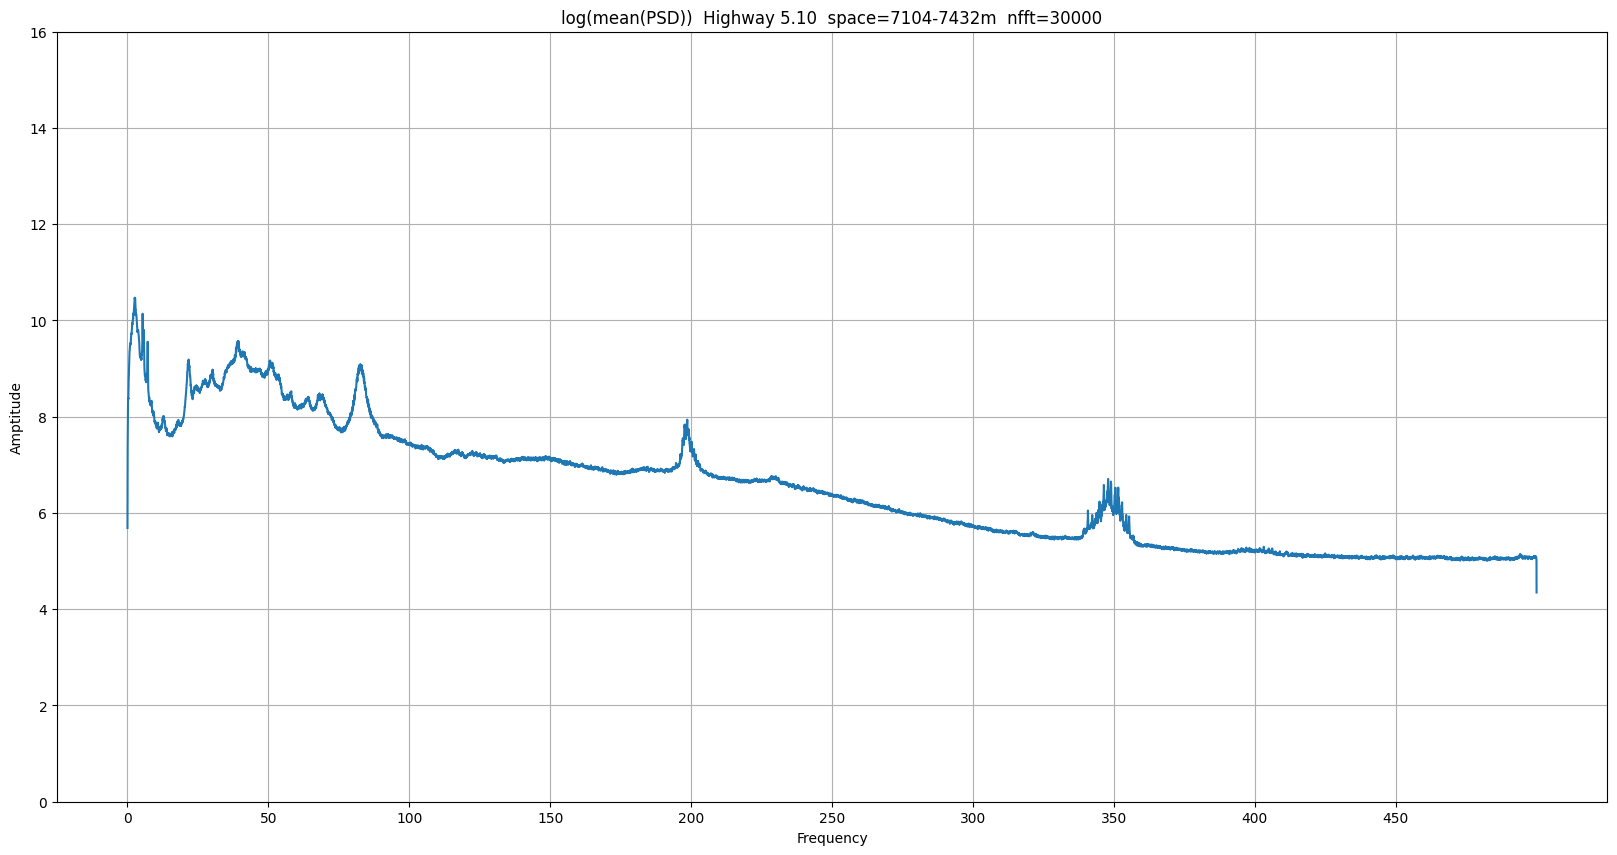

-----------read 965 ------------
72
(900, 15001)
12
(15001,)


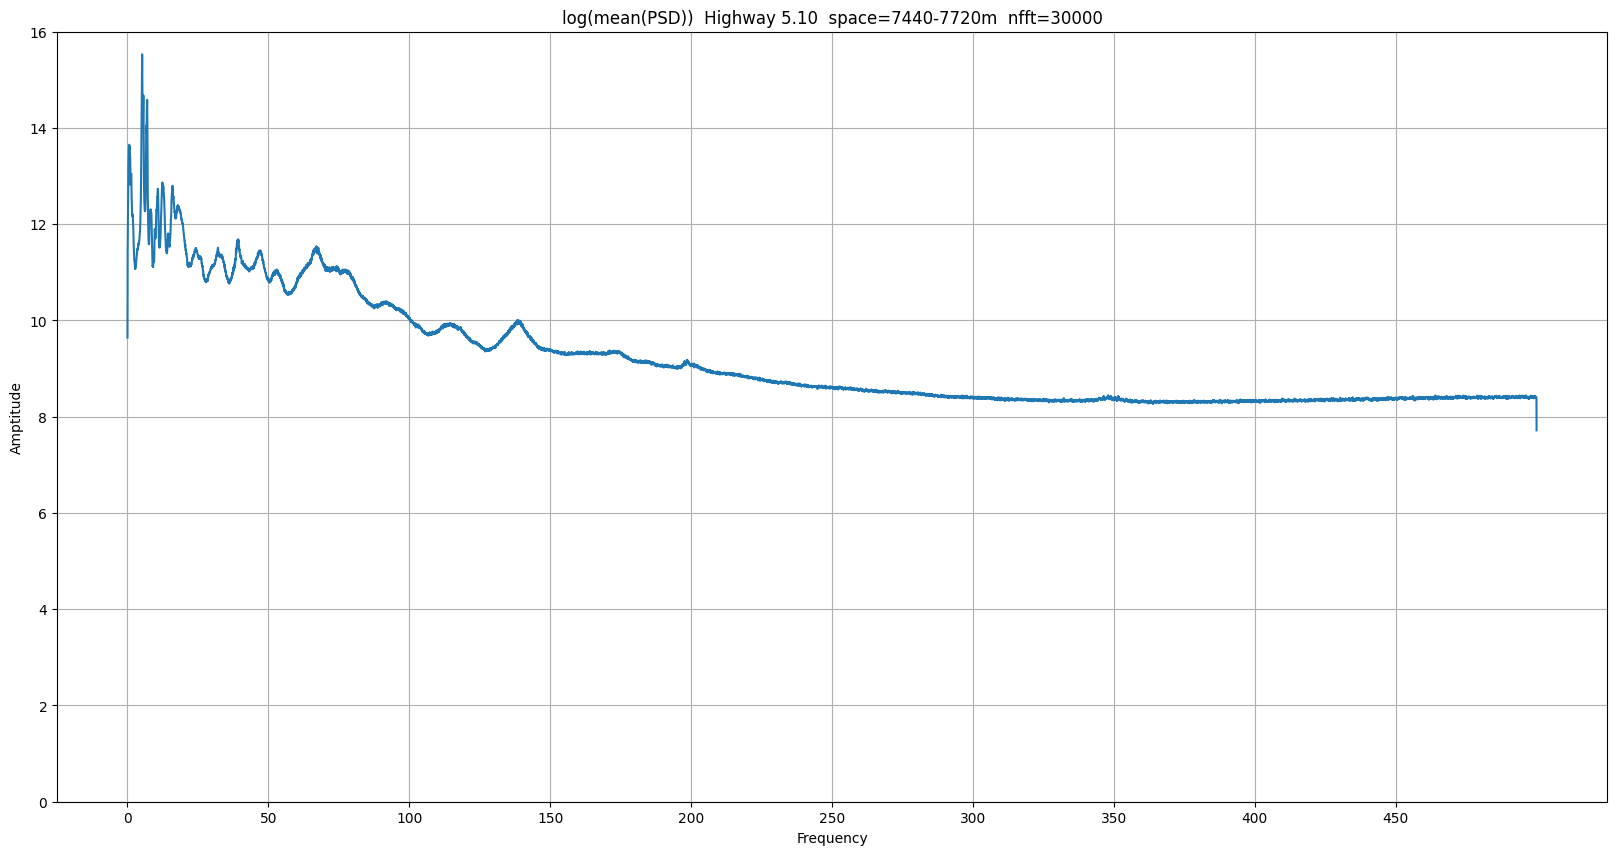

-----------read 1008 ------------
86
(1075, 15001)
12
(15001,)


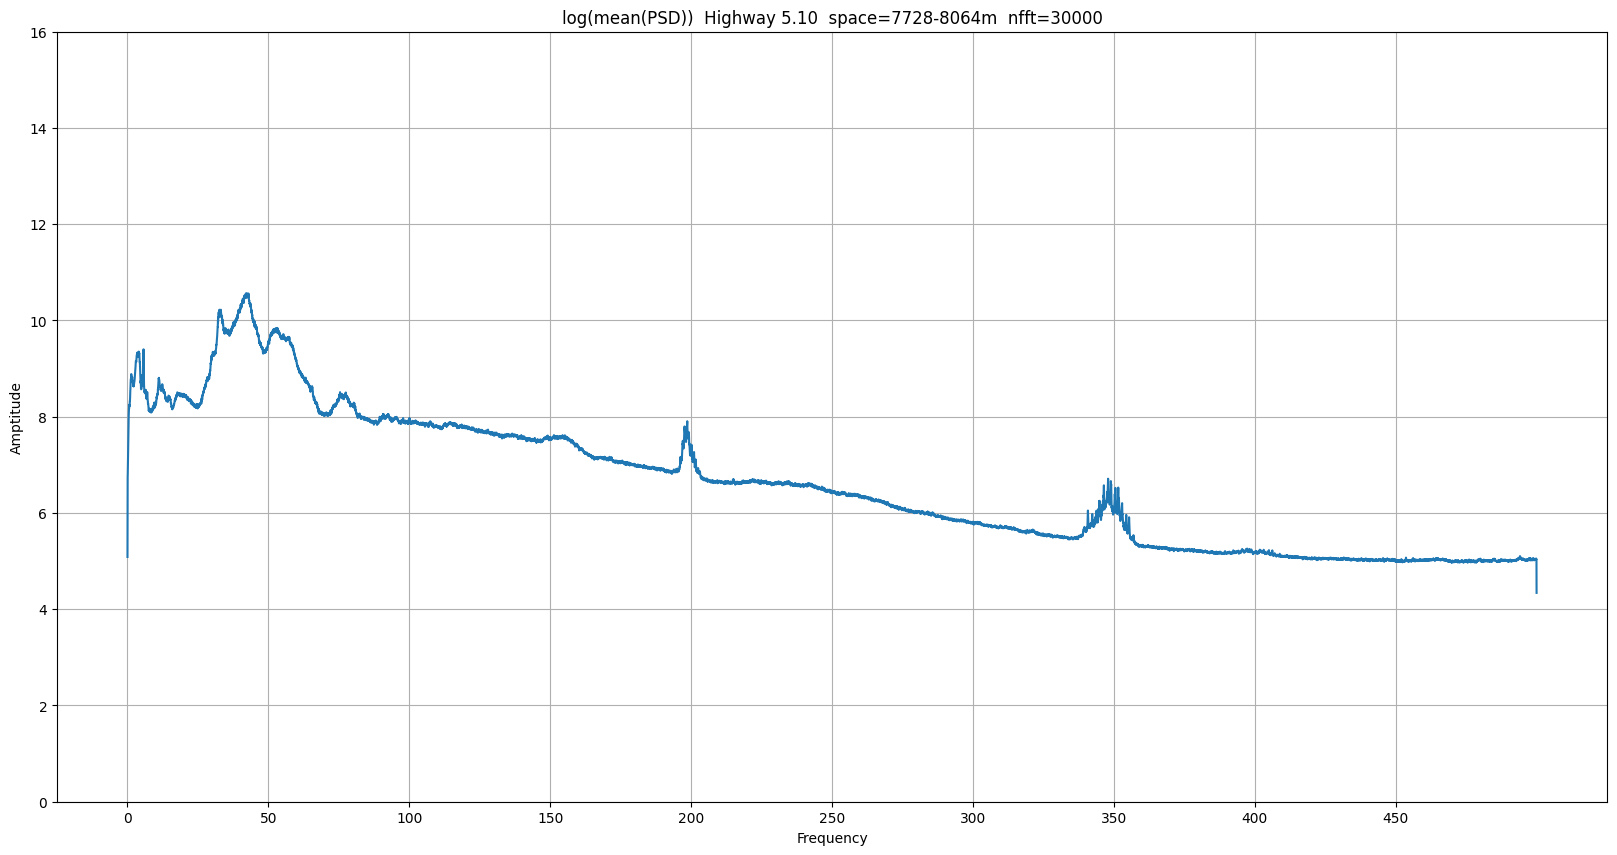

-----------read 1058 ------------
100
(1250, 15001)
12
(15001,)


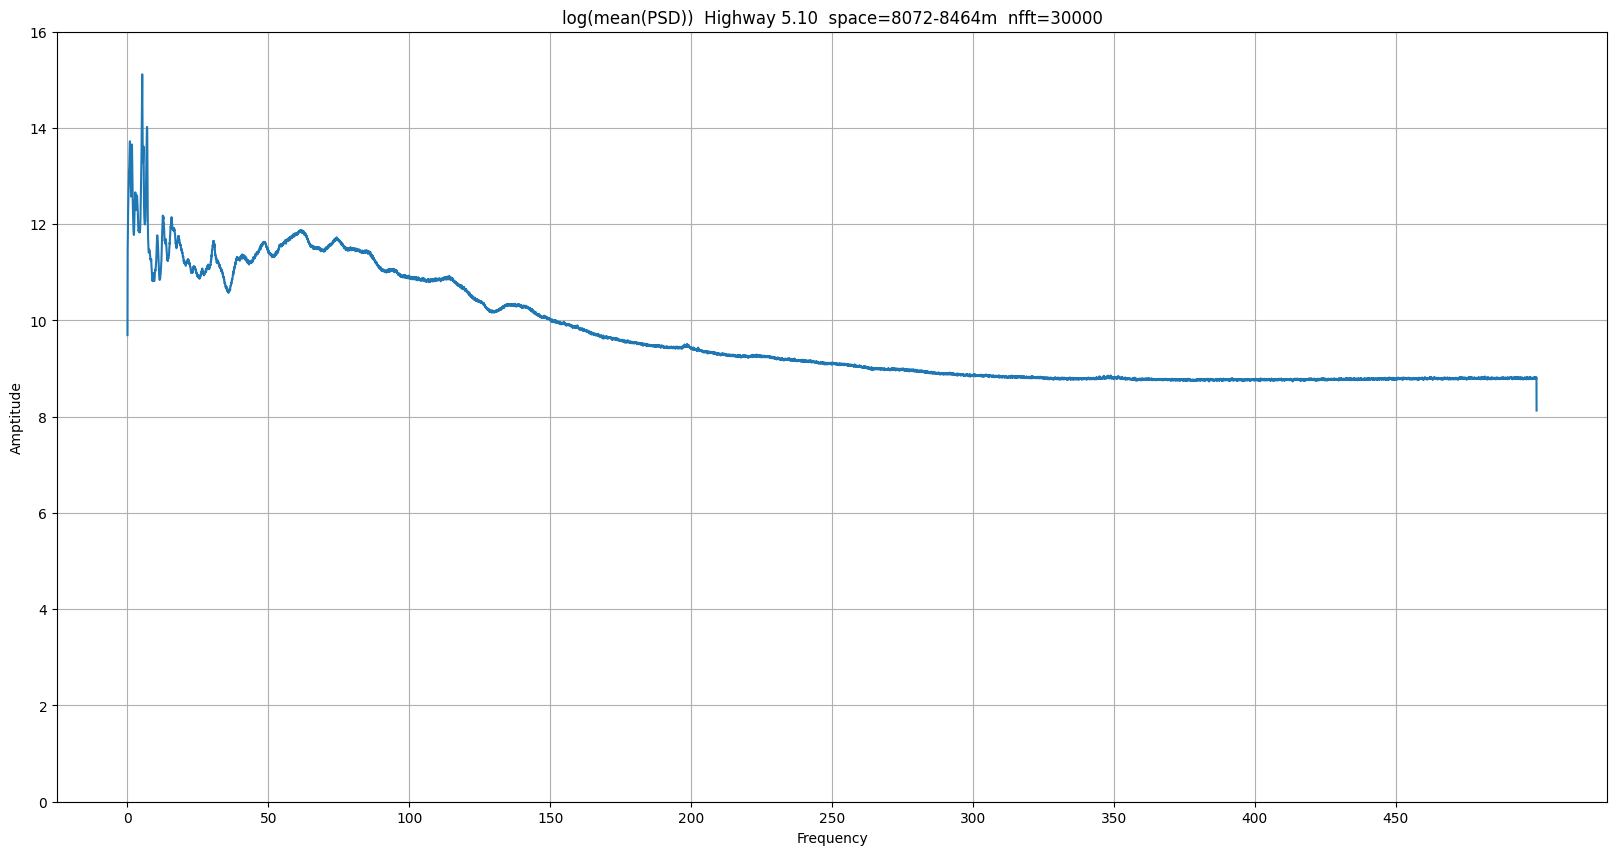

-----------read 1156 ------------
196
(2450, 15001)
12
(15001,)


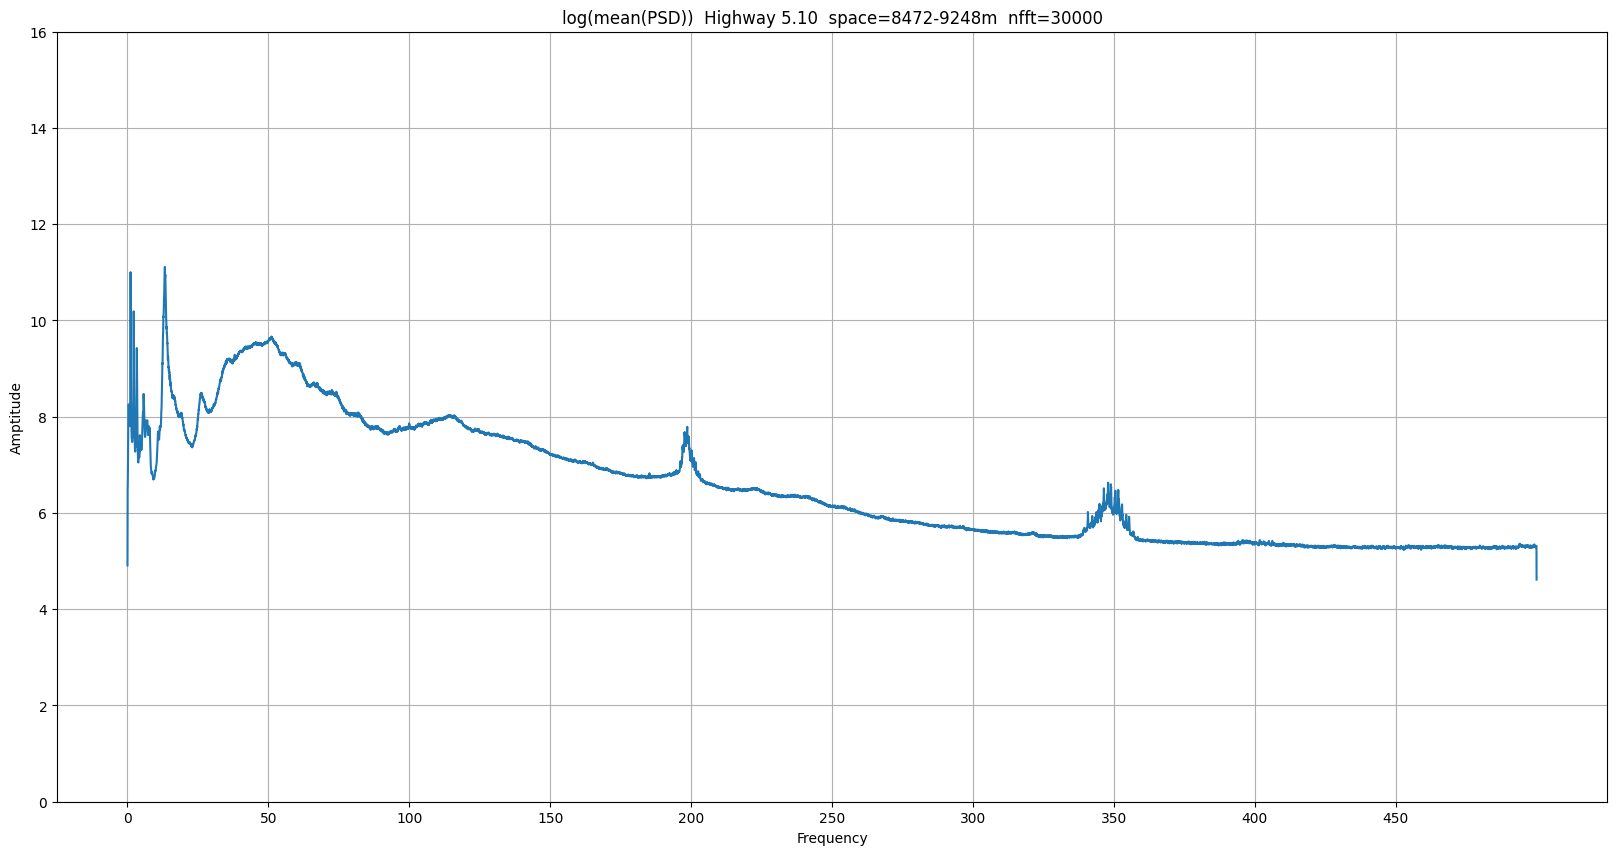

-----------read 1250 ------------
188
(2350, 15001)
12
(15001,)


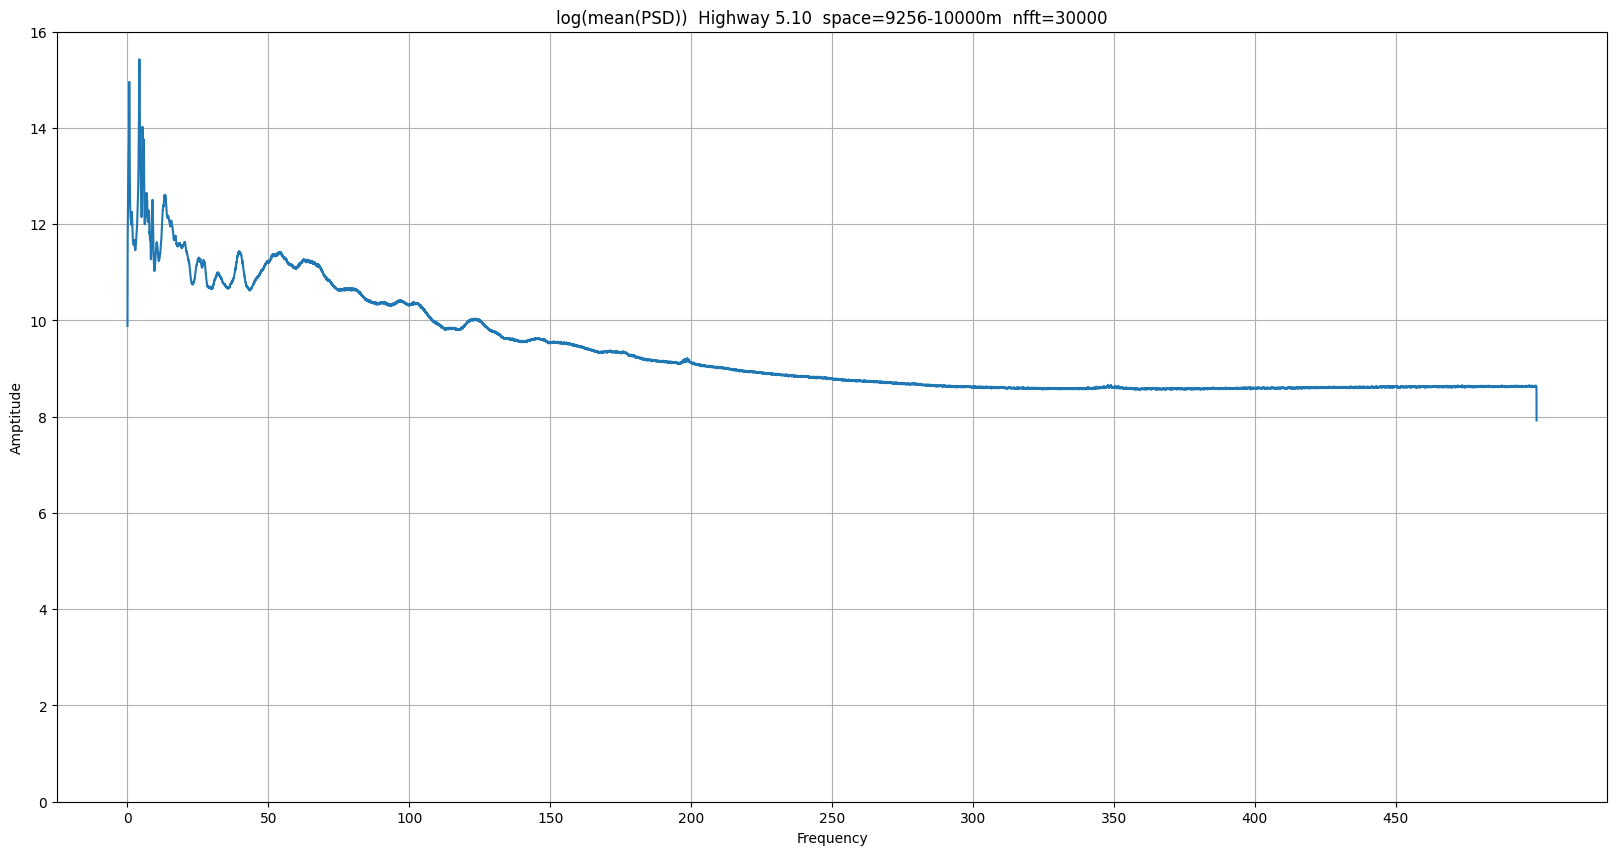

-----------read 1309 ------------
118
(1475, 15001)
12
(15001,)


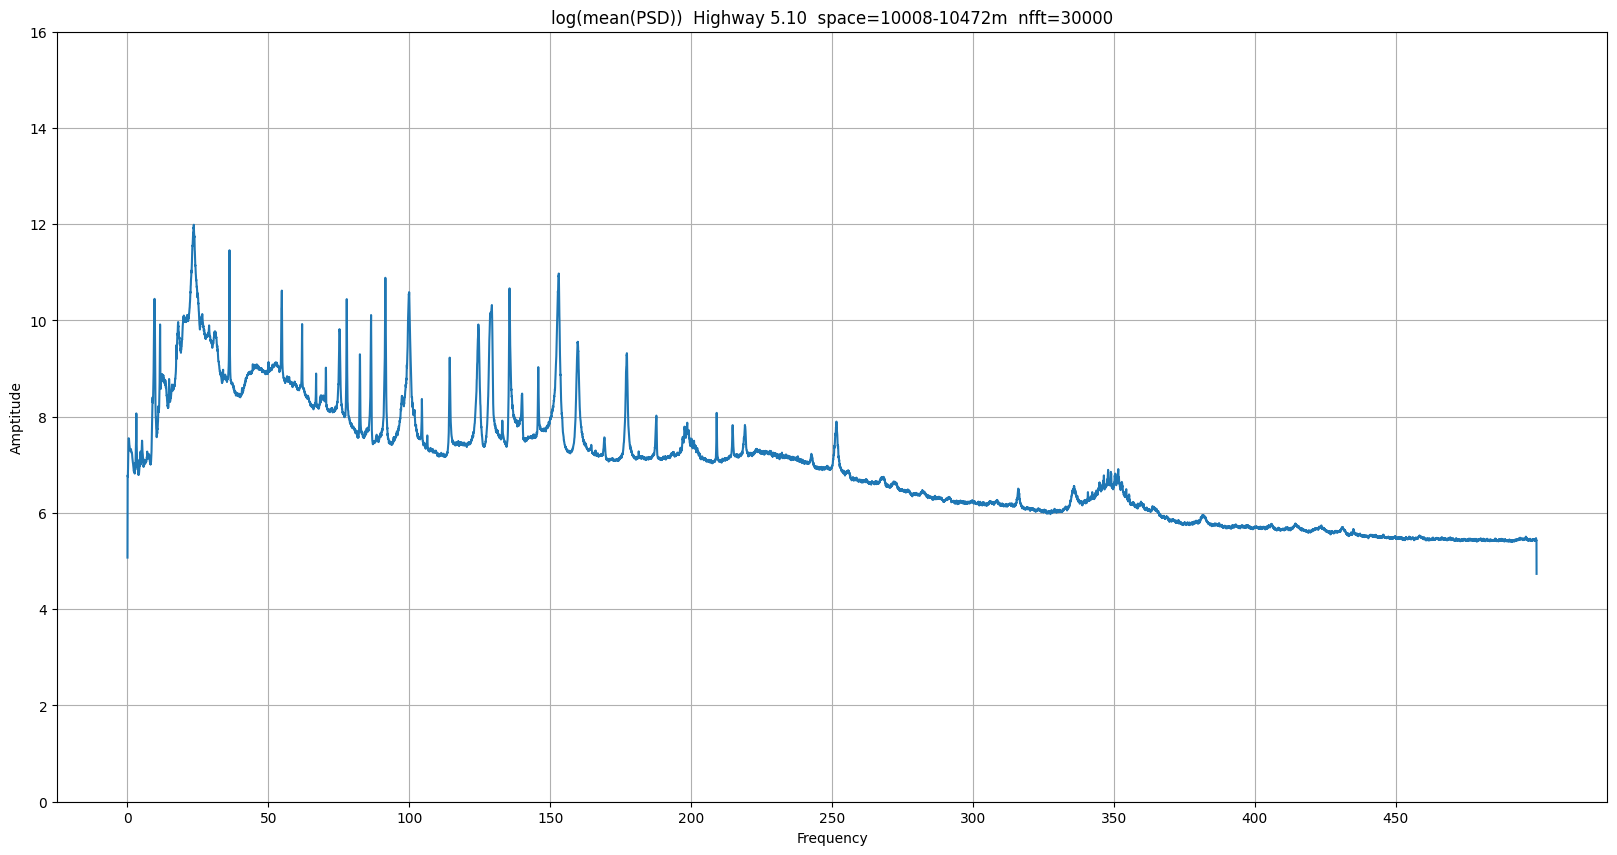

-----------read 1342 ------------
66
(825, 15001)
12
(15001,)


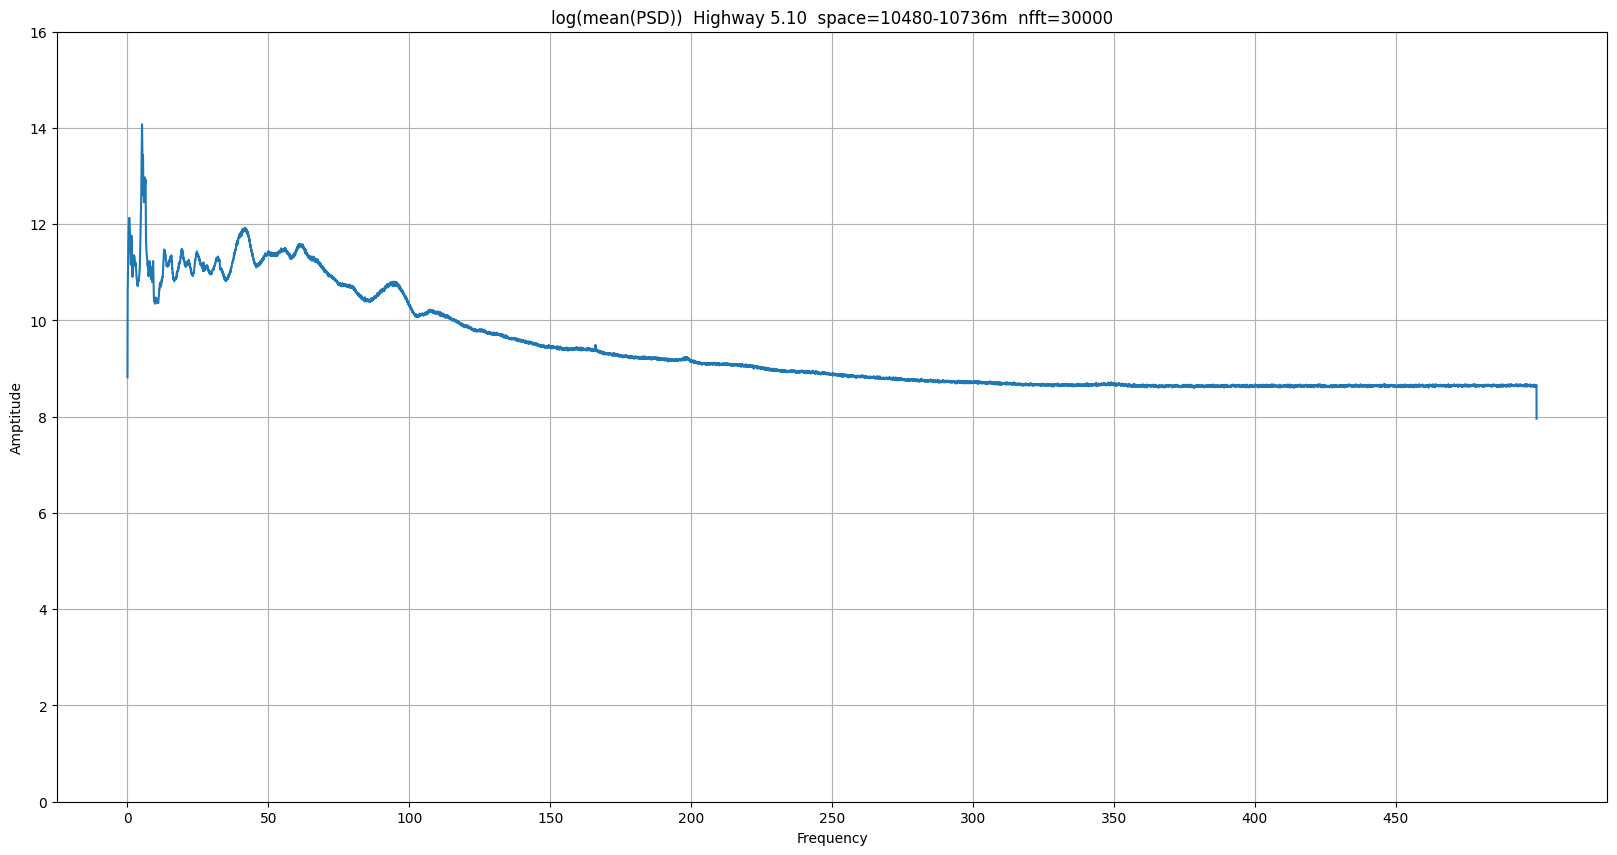

-----------read 1380 ------------
76
(950, 15001)
12
(15001,)


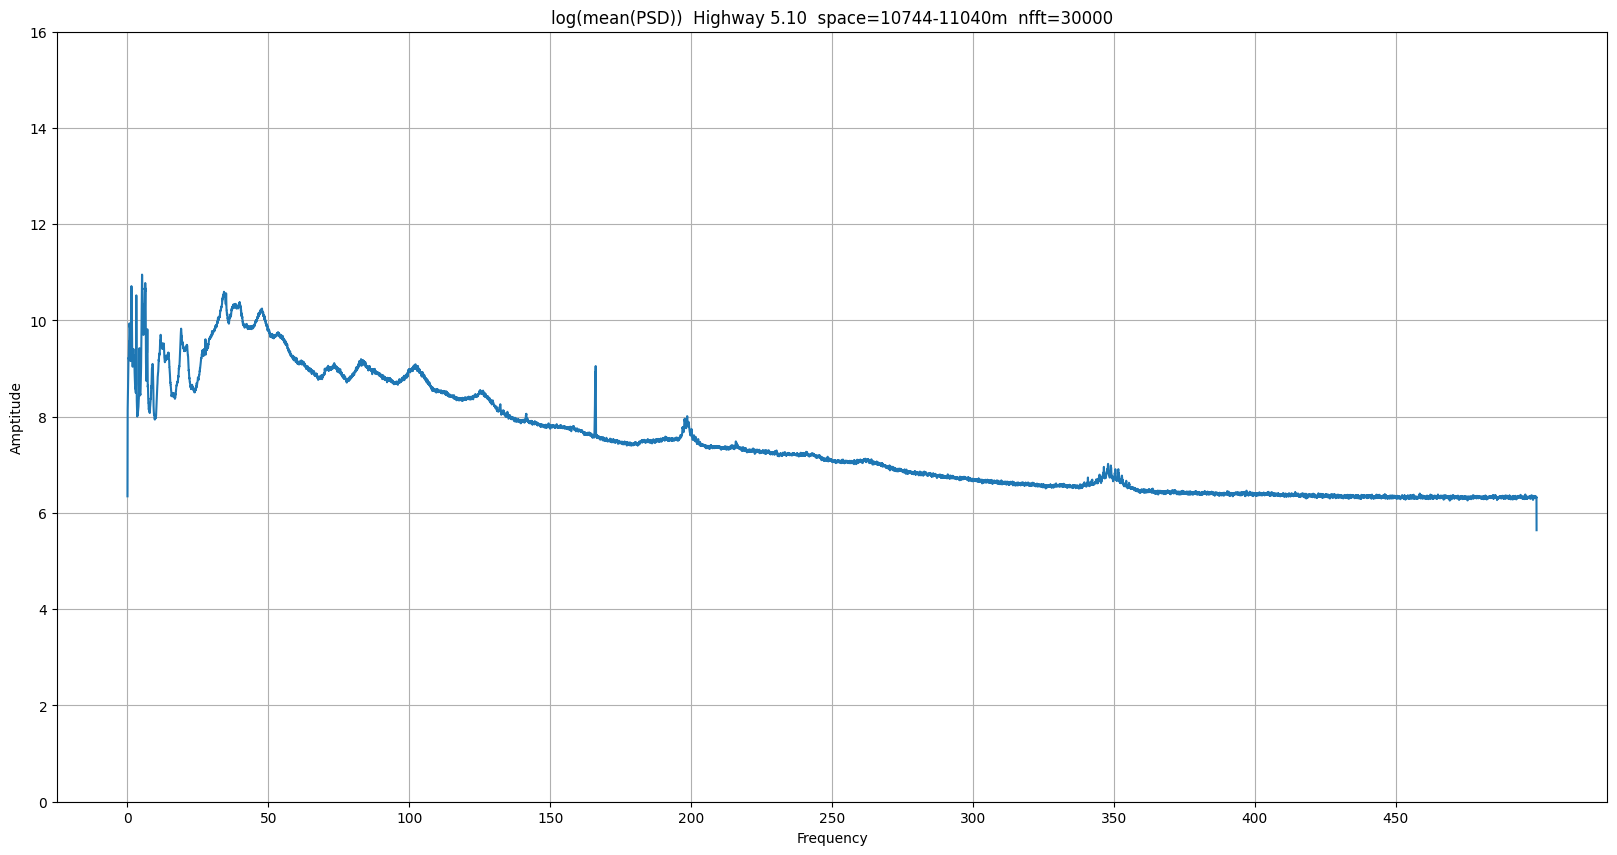

-----------read 1389 ------------
18
(225, 15001)
12
(15001,)


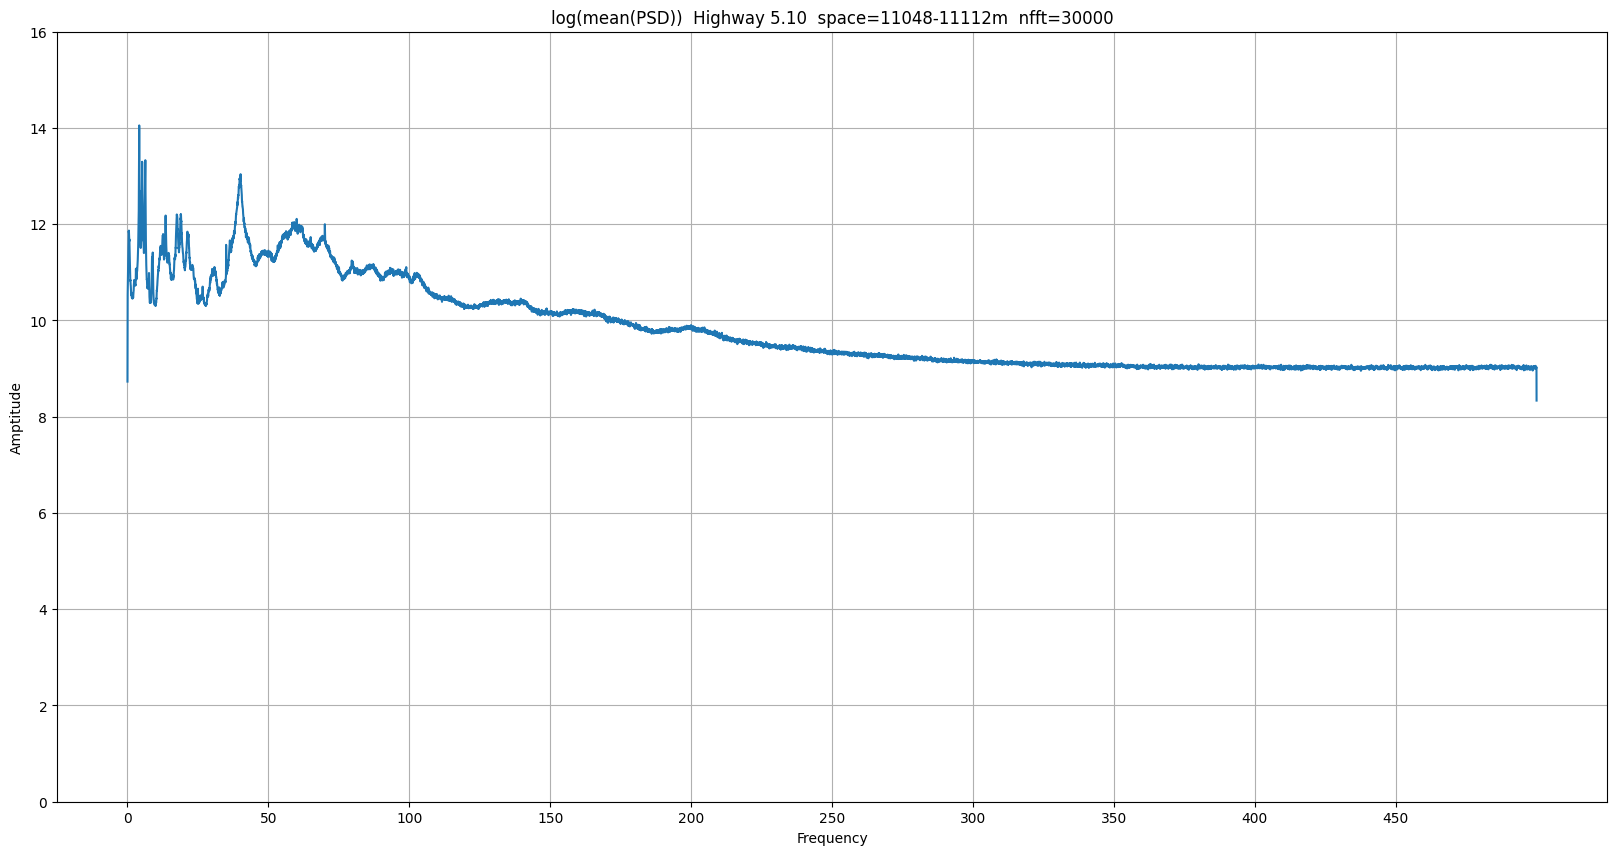

-----------read 1410 ------------
42
(525, 15001)
12
(15001,)


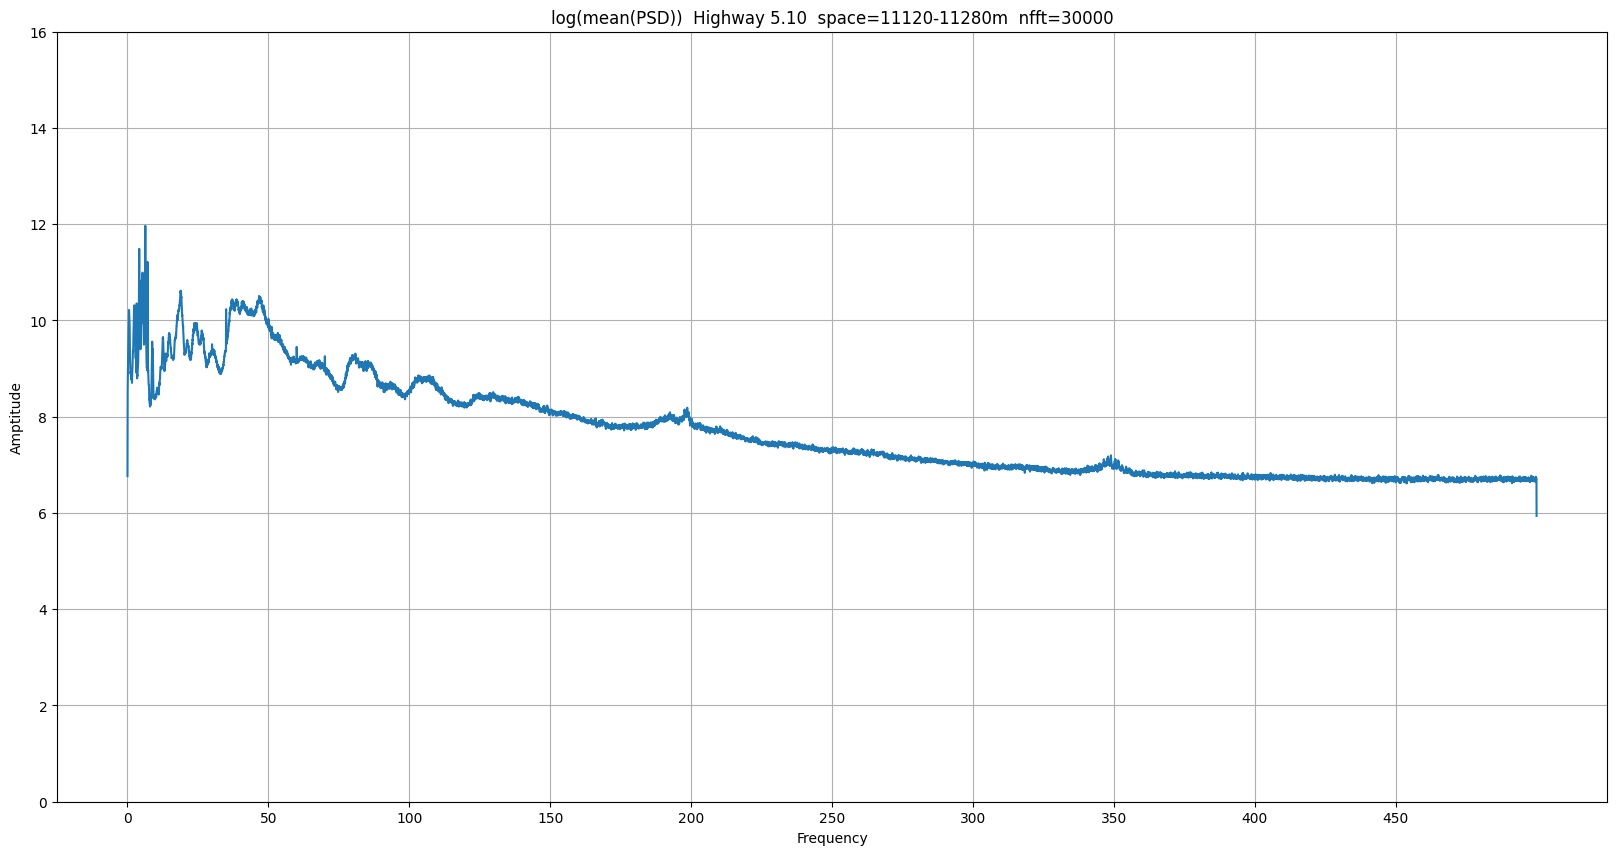

-----------read 1569 ------------
318
(3975, 15001)
12
(15001,)


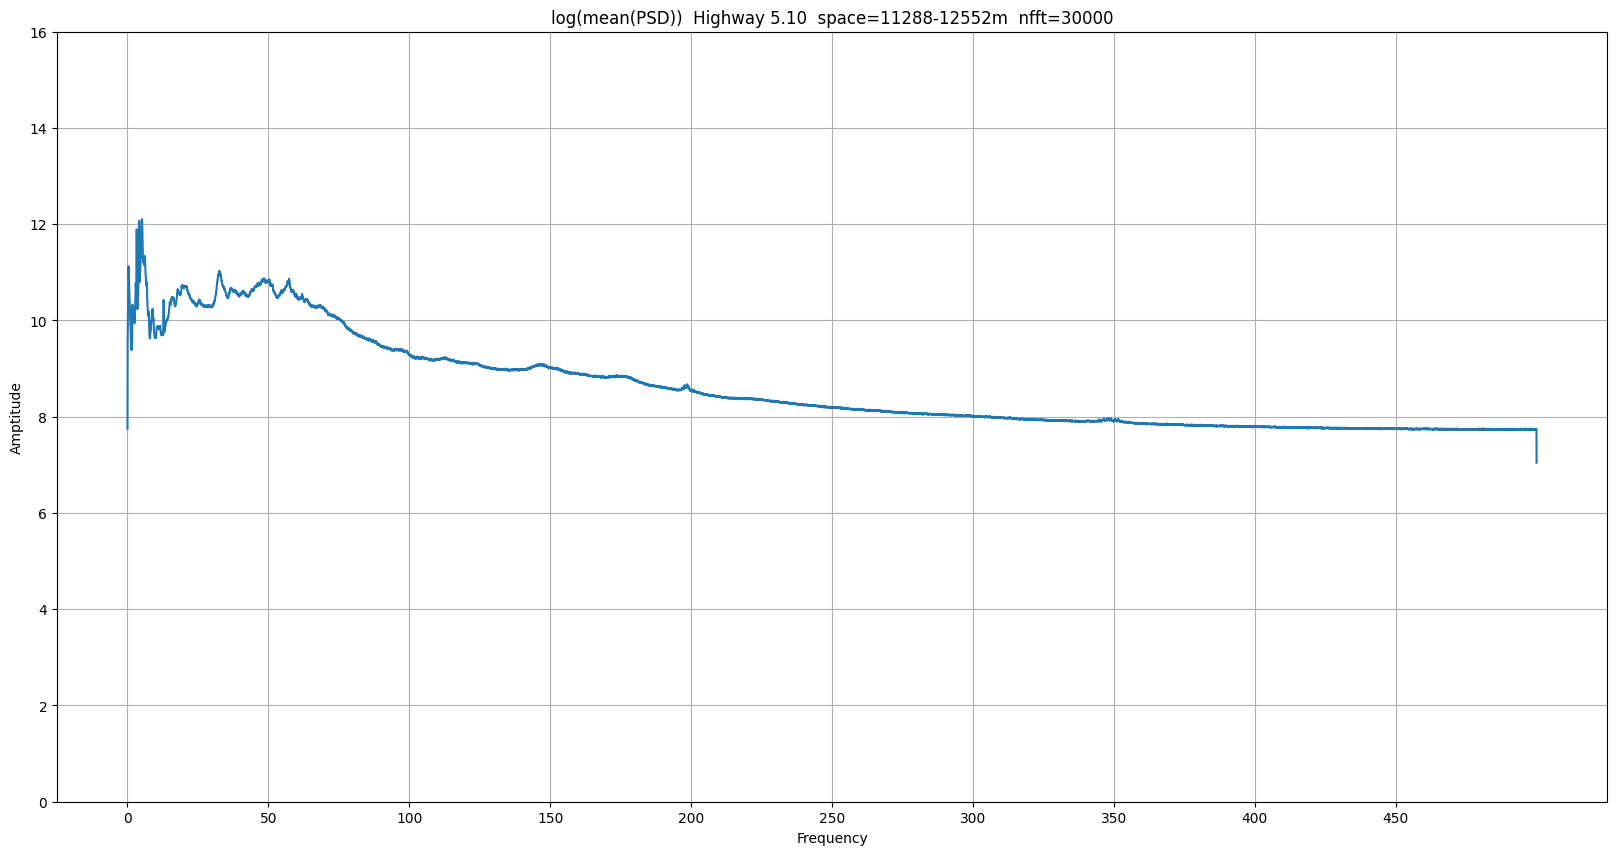

-----------read 1787 ------------
436
(5450, 15001)
12
(15001,)


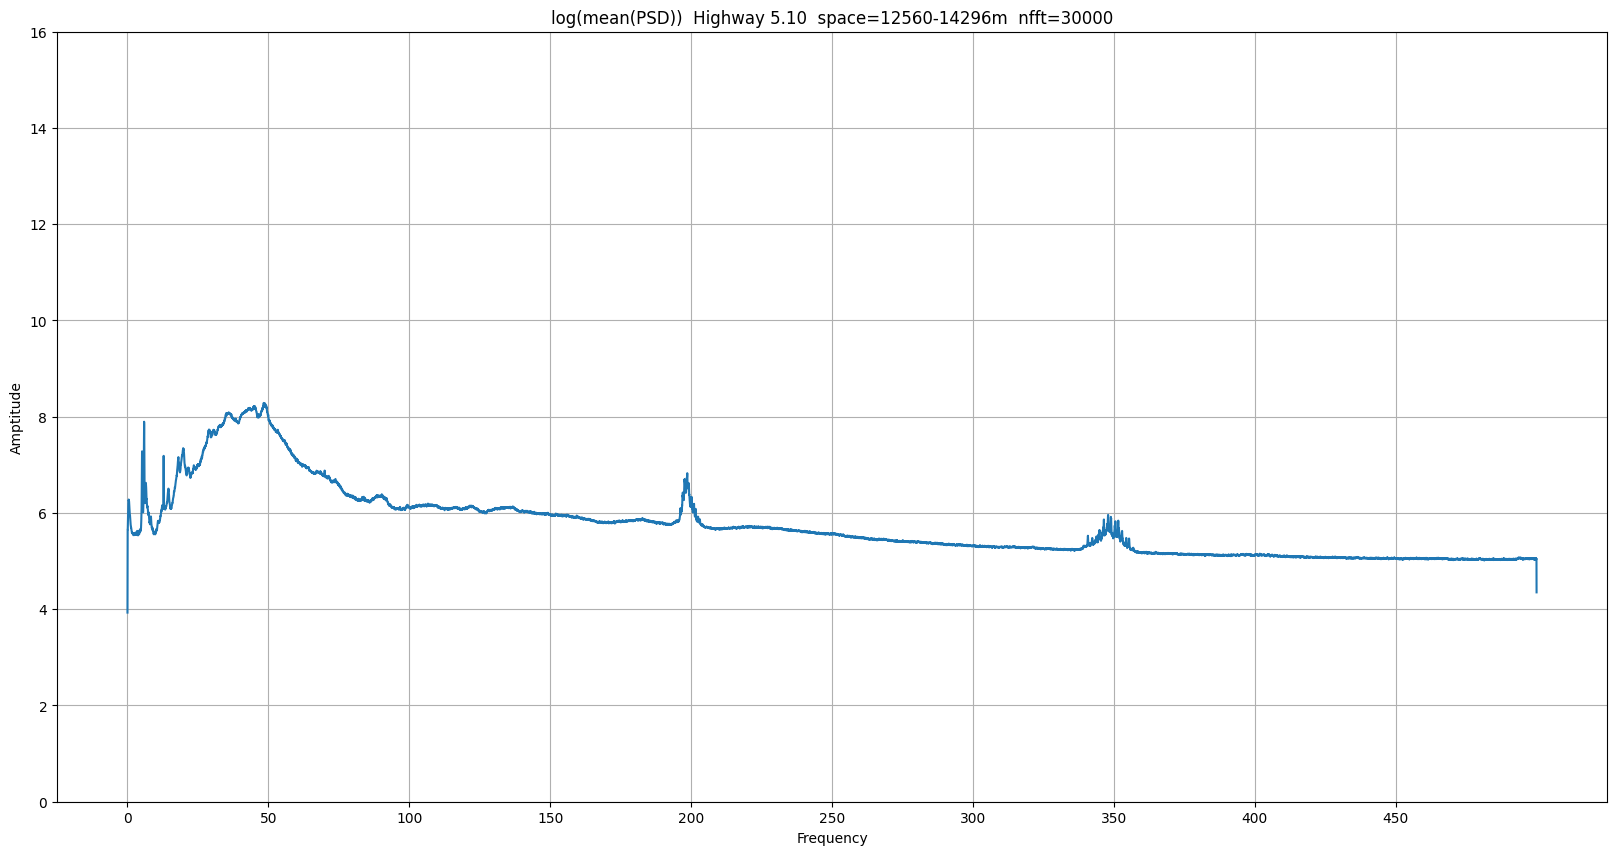

-----------read 1803 ------------
32
(400, 15001)
12
(15001,)


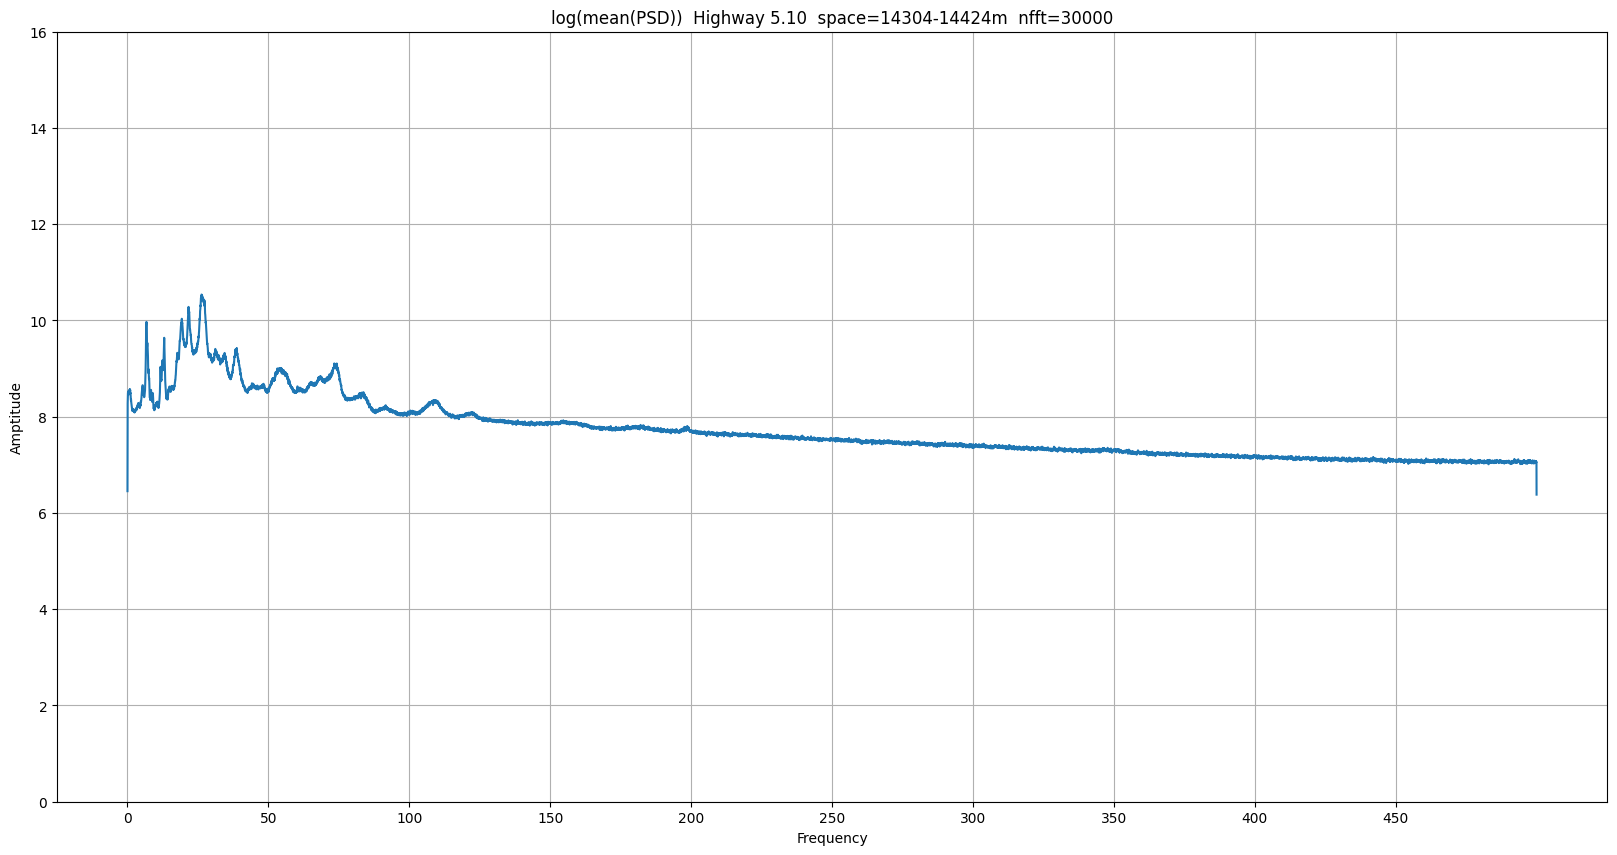

-----------read 1859 ------------
112
(1400, 15001)
12
(15001,)


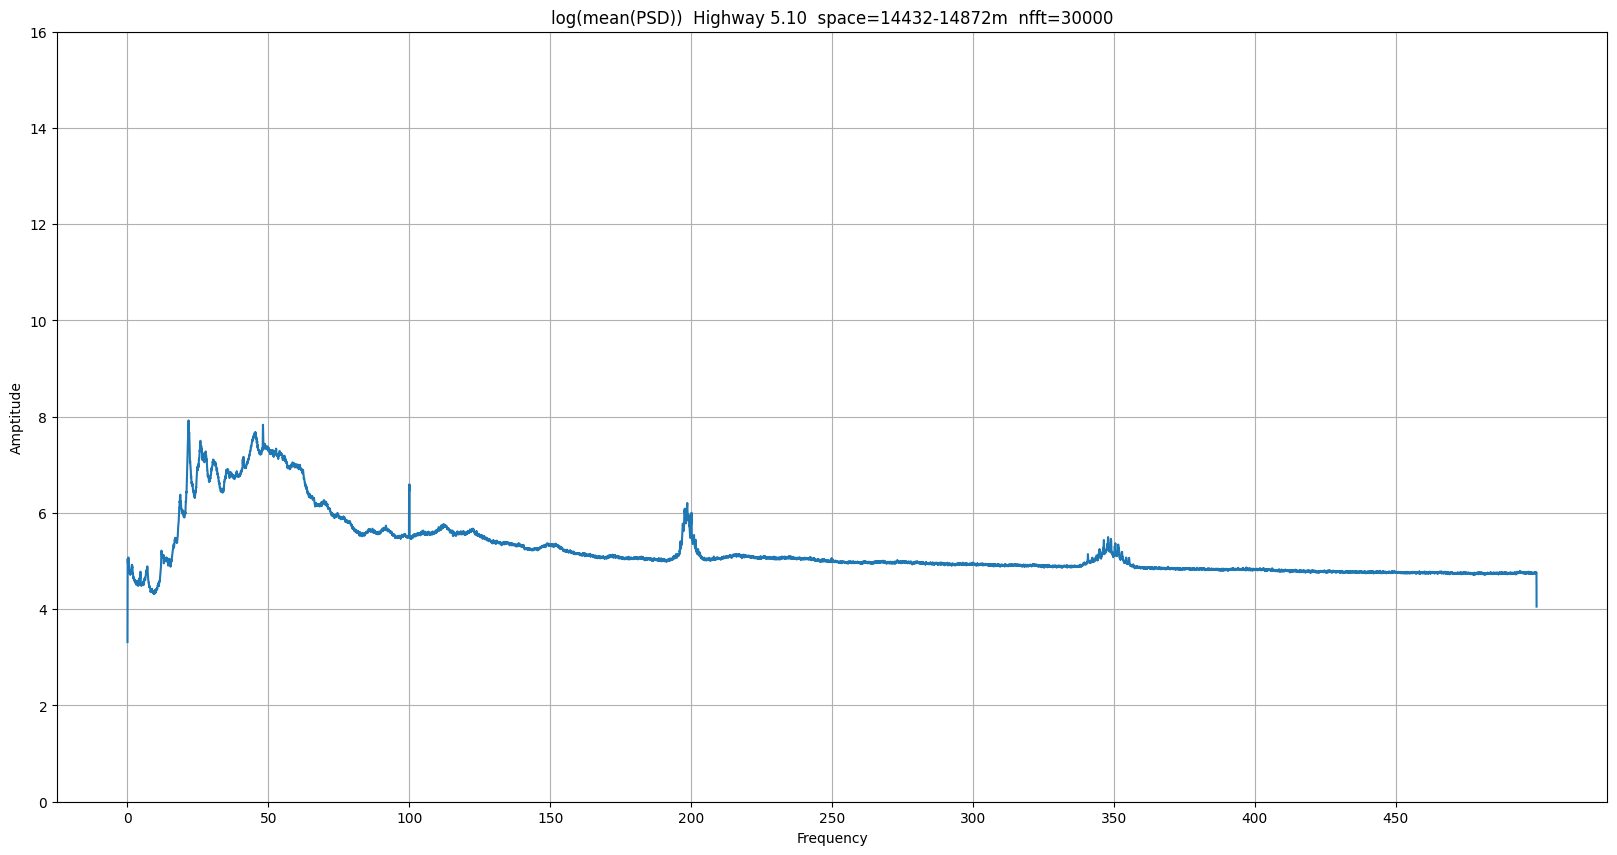

-----------read 1897 ------------
76
(950, 15001)
12
(15001,)


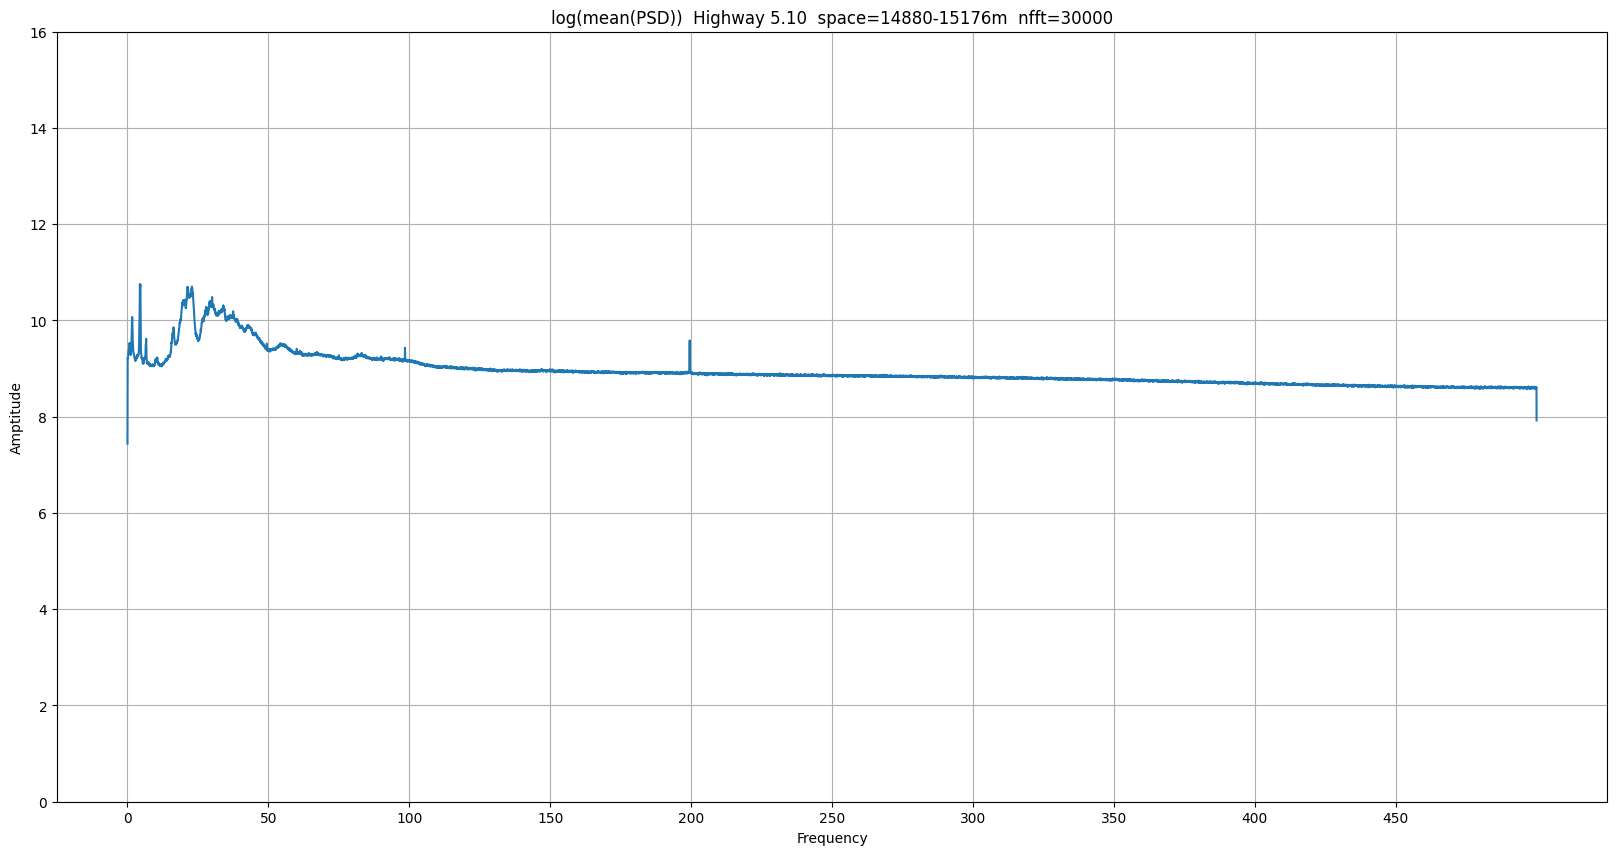

-----------read 1967 ------------
140
(1750, 15001)
12
(15001,)


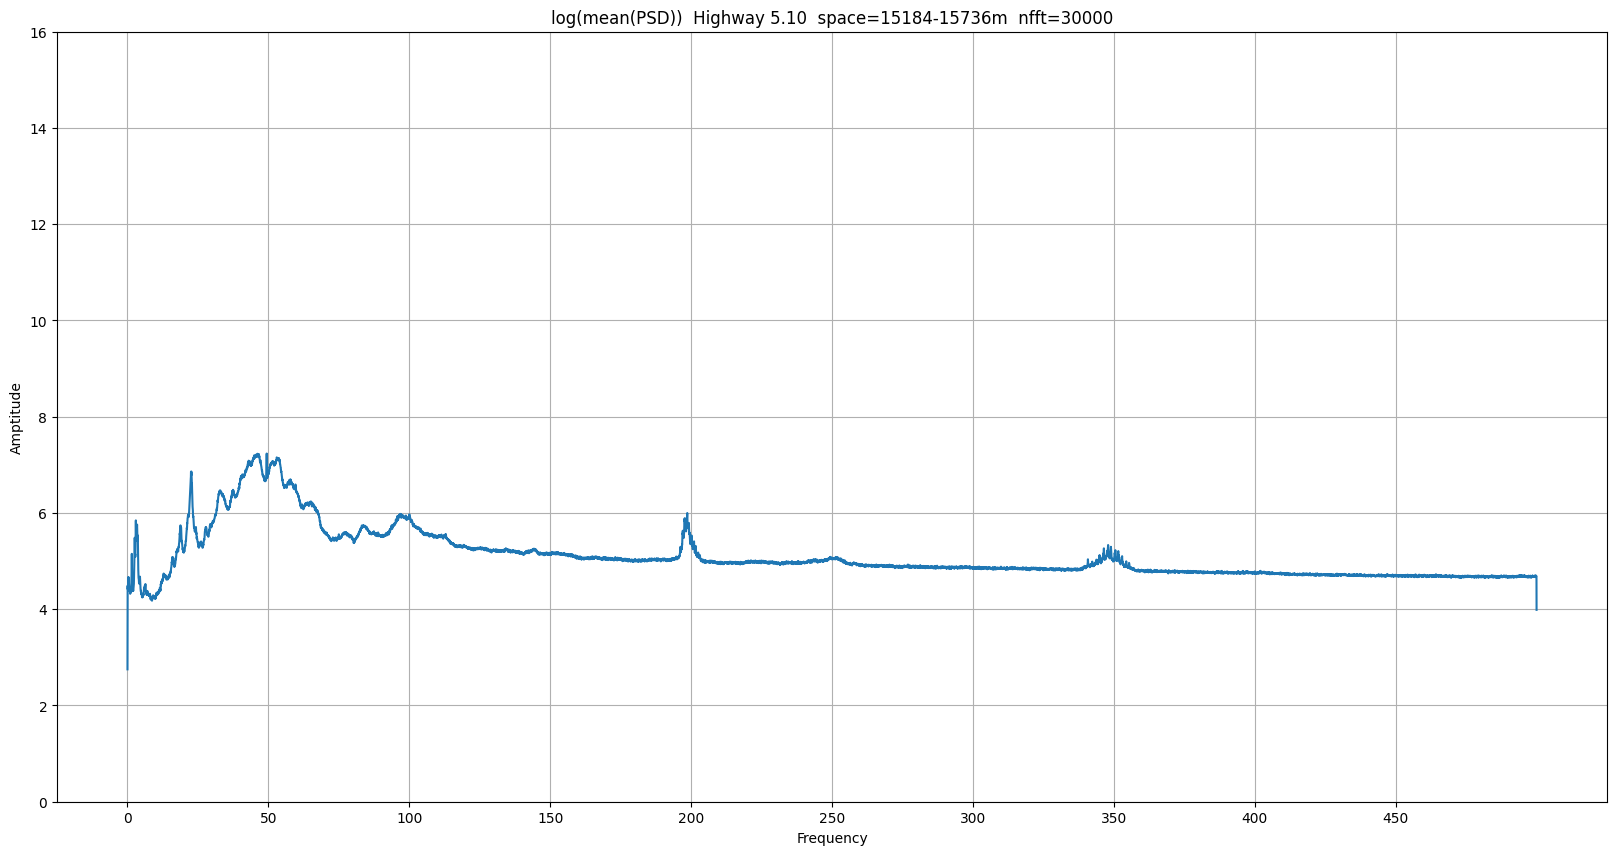

-----------read 2023 ------------
112
(1400, 15001)
12
(15001,)


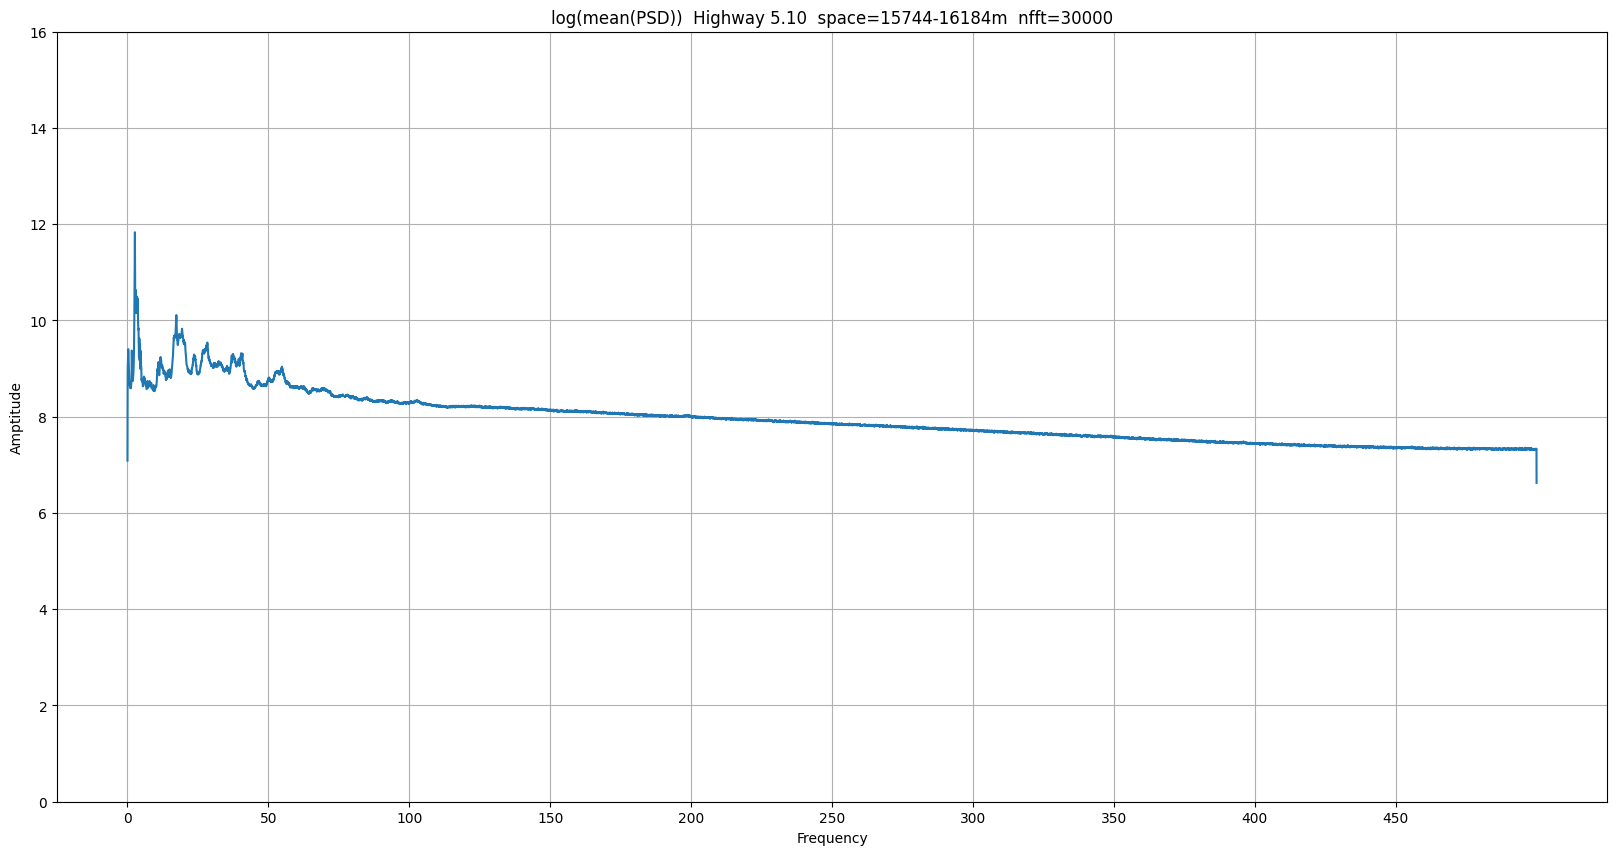

In [13]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt

path = '/mnt/f/Highway_2024_0510/output/psd_5_20_v1/'
if not os.path.exists(path):
    os.makedirs(path)

mutation_stamp = [ 43, 131,  390,406, 427, 434,   470,     553, 587,    625,  679,  685,  745, 763, 770, 855, 865, 888, 930, 966, 1009,
                  1059, 1157, 1251,  1310, 1343,  1381, 1390, 1411, 1570, 1788, 1804, 1860, 1898, 1968, 2024]
for i in range(0 , len(mutation_stamp) -1  , 1):
    chi_list = range(mutation_stamp[i] , mutation_stamp[i+1])
    psd = []
    for ch in chi_list:
        for fi in range(0,2):
            with h5py.File('/mnt/f/Highway_2024_0510/output/psd_5_20_v0/test03_05_10_'+str(fi)+'.hdf5', 'r') as f:
                # print(f.keys())
                if len(f[str(ch)].keys()) == 1 :
                    dset = f[str(ch)]['01']
                else:
                    dset = f[str(ch)]
                time = [key for key in dset.keys()]
                # print(time)
                # start = time.index('20:00:12')
                # time = time[start:]+time[:start]
                # print(time)

                psd.append(  [dset[key][:] for key in time])
                f.close()
    print("-----------read",ch,"------------")
    
    print(len(psd))
    psd = np.concatenate(psd)
    print(psd.shape)
    print(len(time))
    psd = np.log(np.mean(psd,axis=0))
    print(psd.shape)

    plt.figure(figsize=(20,10))
    plt.plot(psd)
    # plt.imshow(psd.T, aspect='auto', cmap='viridis')
    plt.grid(alpha = 1)

    xstick = [1500*i for i in range(10)]
    # print(f['frequency'].shape)

    # plt.xticks(xstick , [time[i][:2]+" "+time[i][3:]  for i in xstick],rotation = 0)

    plt.xticks(xstick , ['%d'% (i/30.)  for i in xstick])
    plt.xlabel("Frequency")
    plt.ylabel("Amptitude")
    plt.ylim(0,16)
    plt.title("log(mean(PSD))  Highway 5.10  space="+str(chi_list[0]*8) + "-" + str(chi_list[-1]*8) +"m  nfft=30000")
    plt.savefig(path+ 'test03_ch_'+str(i)+'_psd.png') #10s per pic
    plt.show()

    plt.close()


